In [1]:
#-*- coding: cp949 -*-

필요한 라이브러리를 추가합니다

In [3]:
import numpy as np
import pandas as pd
from konlpy.tag import Kkma
from konlpy.utils import pprint 
kkma = Kkma()

# 1-1) doc번호와 색인어 추출

색인어를 추출하기 위해 텍스트파일 623개를 불러옵니다.

In [4]:
with open('./fnames.txt', 'r') as f:
    fnames = f.read().splitlines()
    
#fnames

623개의 파일을 잘 읽었는지 확인합니다.

In [5]:
total_number_of_file = len(fnames)
print("파일 전체 갯수는 :" ),
print(total_number_of_file)

파일 전체 갯수는 : 623


불러온 파일의 텍스트 내용을 받아
contents_in_file 리스트에 담았습니다.

In [6]:
contents_in_file = []

for idx in range(0, len(fnames)):
    f = open('./data/' + fnames[idx], 'r')
    tmp_content = f.read()
    contents_in_file.append(tmp_content)

news의 내용을 출력해보는 코드입니다.

In [7]:
#print(unicode(content,'euc-kr'))

# 색인어 추출

term 가지고 오기(nouns)

각 텍스트파일이 어떻게 인코딩 되어있는지 보기 위한 코드입니다.

In [8]:
import chardet
for i in range(54, 623):
    f = open('./data/' + fnames[i], 'r')
    tmp_content = f.read()
    if(chardet.detect(tmp_content)['encoding'] != 'EUC-KR'):
        print(fnames[i])
        print (chardet.detect(tmp_content))
        print(str(i) + ':'+ fnames[i])        
    #print(type(tmp_content))
    #print(fnames[0])

#print(tmp_content)
#kkma.nouns((tmp_content))


In [20]:
#기사 내용과 색인어를 출력해보는 코드입니다.
#print(contents_in_file[54])
#term= (kkma.nouns(unicode(contents_in_file[54], 'EUC-KR')))

#INDEX_WORD dataframe : doc번호와, 해당 문서에서 나온 색인어를 담습니다
#doc번호와, term을 추가합니다

In [9]:
doc_and_term = pd.DataFrame()
for idx in range(0, total_number_of_file):
    print(str(idx)+  " : " + fnames[idx])
    noun = []
    term= (kkma.pos(unicode(contents_in_file[idx], 'EUC-KR')))
    for tup in (term):
        if(tup[1] == 'NNG'):
            noun.append(tup[0])
    doc = [idx]*len(noun)
    tmp_term = pd.DataFrame({'term' : noun,
                        'doc' : doc})
    print(tmp_term)
    doc_and_term = pd.concat([doc_and_term, tmp_term])
    
    '''
    tmp_content= nouns_in_file[idx]
    content = unicode(nouns_in_file[4],'euc-kr')
    term= (kkma.nouns(unicode(t,'euc-kr')))
    pprint(term)
    doc = [idx]*len(term)
    tmp_term = pd.DataFrame({'term' : term,
                            'doc' : doc})
    INDEX_WORD.concat(tmp_term)
    '''
    
'''  
term3= (kkma.nouns(unicode(content2,'euc-kr')))
pprint(term3)

'''


0 : IT-2007newWebIR.txt
     doc  term
0      0    유럽
1      0     판
2      0     구
3      0     글
4      0    에로
5      0     주
6      0     춤
7      0    독일
8      0    정부
9      0     구
10     0     글
11     0   경쟁자
12     0    부상
13     0    중인
14     0    유럽
15     0    검색
16     0    엔진
17     0    업체
18     0    에로
19     0    지원
20     0    철회
21     0     넷
22     0   프랑스
23     0    판과
24     0   실리콘
25     0    닷컴
26     0    현지
27     0    시각
28     0    보도
29     0    유럽
..   ...   ...
174    0   온라인
175    0    공간
176    0   시청각
177    0    자료
178    0    검색
179    0   플랫폼
180    0    개발
181    0    중인
182    0    사업
183    0  프로젝트
184    0   오스트
185    0     리
186    0   핀란드
187    0   프랑스
188    0    독일
189    0  노르웨이
190    0   스페인
191    0   스위스
192    0    영국
193    0    세계
194    0   협력사
195    0    참여
196    0    정소
197    0     영
198    0    기자
199    0    전자
200    0    신문
201    0    신문
202    0    게재
203    0    일자

[204 rows x 2 columns]
1 : IT-20HPnotebook.tx

     doc  term
0      9    중국
1      9     판
2      9     구
3      9     글
4      9    일본
5      9    시장
6      9    진출
7      9    중국
8      9    최대
9      9   인터넷
10     9    검색
11     9    업체
12     9    일본
13     9    진출
14     9    중국
15     9     판
16     9     구
17     9     글
18     9     로
19     9    이두
20     9    닷컴
21     9    로고
22     9     은
23     9    내년
24     9    일본
25     9    검색
26     9   서비스
27     9    시작
28     9     월
29     9  스트리트
..   ...   ...
176    9  비즈니스
177    9   이상적
178    9    무대
179    9     라
180    9    중국
181    9    성공
182    9    신화
183    9    일본
184    9     고
185    9    우선
186    9    자체
187    9   서비스
188    9   목표지
189    9    일본
190    9    업체
191    9    협력
192    9    방안
193    9    검토
194    9    인수
195    9    합병
196    9    진출
197    9   가능성
198    9    시사
199    9    강병
200    9    기자
201    9    전자
202    9    신문
203    9    신문
204    9    게재
205    9    일자

[206 rows x 2 columns]
10 : IT-billJobs.txt
     doc   term
0     10 

     doc  term
0     18    내년
1     18    축소
2     18    세계
3     18    최대
4     18   컴퓨터
5     18    정보
6     18    통신
7     18   전시회
8     18    내년
9     18   상당수
10    18    영국
11    18    방송
12    18    주최
13    18     키
14    18   미디어
15    18   내년도
16    18    국가
17    18    하나
18    18   전시회
19    18    제외
20    18   나머지
21    18    개최
22    18   시카고
23    18   캐나다
24    18   밴쿠버
25    18    트리
26    18     올
27    18     진
28    18    시회
29    18    구경
..   ...   ...
120   18    베이
121   18    개최
122   18     본
123   18   전시회
124   18    일본
125   18    종합
126   18    전자
127   18    회사
128   18    소니
129   18   세계적
130   18    업체
131   18    불참
132   18    통보
133   18    사실
134   18    최근
135   18    확인
136   18     키
137   18   미디어
138   18    동안
139   18    세계
140   18    최대
141   18    행사
142   18    명성
143   18     빛
144   18    기선
145   18    기자
146   18    신문
147   18    게재
148   18    일자
149   18  입력시간

[150 rows x 2 columns]
19 : IT-comHealth.txt
     doc term
0     19  

     doc   term
0     27    지상파
1     27      단
2     27     말기
3     27     시청
4     27     불능
5     27     대란
6     27     예고
7     27     국내
8     27     보급
9     27    대부분
10    27    지상파
11    27    디지털
12    27  멀티미디어
13    27     방송
14    27     단말
15    27     기가
16    27    다음달
17    27     수신
18    27    오작동
19    27    가능성
20    27     제기
21    27    사업자
22    27     물론
23    27      단
24    27     말기
25    27     제조
26    27     업체
27    27     비상
28    27    지상파
29    27     특별
..   ...    ...
199   27     혼란
200   27    최소화
201   27     계획
202   27      김
203   27    지상파
204   27     특별
205   27    위원회
206   27   사무국장
207   27     일부
208   27     중소
209   27    제조사
210   27    가운데
211   27    오작동
212   27    위험성
213   27     대책
214   27     생각
215   27     경향
216   27    판매대
217   27     수가
218   27      전
219   27     문제
220   27      고
221   27     성호
222   27      철
223   27     기자
224   27     전자
225   27     신문
226   27     신문
227   27     게재
228   27     일자

[229 ro

     doc  term
0     36    악성
1     36    코드
2     36   액티브
3     36    엑스
4     36    다운
5     36    로더
6     36   액티브
7     36    엑스
8     36    다운
9     36    로더
10    36    해커
11    36   스파이
12    36    웨어
13    36    웨어
14    36    악성
15    36    코드
16    36    유포
17    36    방식
18    36    사용
19    36   액티브
20    36    엑스
21    36    다운
22    36    로더
23    36    특정
24    36  프로그램
25    36     로
26    36    설치
27    36    형태
28    36    방식
29    36    변경
..   ...   ...
161   36    변형
162   36    발견
163   36    건수
164   36    절반
165   36    감소
166   36    신종
167   36    변형
168   36    다운
169   36    로더
170   36     배
171   36   가까이
172   36    증가
173   36     안
174   36     티
175   36   스파이
176   36    웨어
177   36     티
178   36     바
179   36   실시간
180   36    감시
181   36    기능
182   36    이용
183   36  업데이트
184   36     고
185   36    권고
186   36     김
187   36     순
188   36    기자
189   36    전자
190   36    신문

[191 rows x 2 columns]
37 : IT-explorer.txt
     doc   term
0     37 

     doc term
0     46    구
1     46    글
2     46   발목
3     46   질주
4     46    구
5     46    글
6     46   최대
7     46   고비
8     46    구
9     46    글
10    46  온라인
11    46   광고
12    46   업체
13    46   더블
14    46   클릭
15    46   인수
16    46   독점
17    46   논란
18    46  본격적
19    46   시작
20    46    구
21    46    글
22    46  온라인
23    46    배
24    46   광고
25    46   막강
26    46  영향력
27    46   더블
28    46   클릭
29    46   달러
..   ...  ...
208   46   통해
209   46    구
210   46    글
211   46   견제
212   46   의도
213   46   강해
214   46   관련
215   46   업계
216   46   촉각
217   46  청문회
218   46   참석
219   46    한
220   46   검사
221   46   이번
222   46   인수
223   46   합병
224   46   최종
225   46   결과
226   46  인터넷
227   46   산업
228   46   지형
229   46   변화
230   46   예고
231   46  분수령
232   46    류
233   46    현
234   46    정
235   46   기자
236   46   전자
237   46   신문

[238 rows x 2 columns]
47 : IT-google.txt
     doc   term
0     47     기사
1     47     분야
2     47     국제
3     47     등록
4     47 

     doc term
0     55    구
1     55    글
2     55   한국
3     55   시장
4     55   진출
5     55    구
6     55    글
7     55   한국
8     55   시장
9     55   진출
10    55  가운데
11    55   최근
12    55    구
13    55    글
14    55   행보
15    55   업계
16    55   촉각
17    55    구
18    55    글
19    55   클릭
20    55   당과
21    55    금
22    55   방식
23    55  키워드
24    55   검색
25    55   광고
26    55   계약
27    55   체결
28    55    엠
29    55   파스
..   ...  ...
216   55   접촉
217   55    엠
218   55   파스
219   55    구
220   55    글
221   55   협력
222   55   강화
223   55    미
224   55    구
225   55    글
226   55   본사
227   55  한국행
228   55   연수
229   55   일련
230   55   상황
231   55    글
232   55   한국
233   55   시장
234   55   진출
235   55  가시권
236   55   관심
237   55   표명
238   55    김
239   55   유경
240   55   기자
241   55   전자
242   55   신문
243   55   신문
244   55   게재
245   55   일자

[246 rows x 2 columns]
56 : IT-googleKorea.txt
     doc      term
0     56         구
1     56         글
2     56        한국
3     56

     doc term
0     64    구
1     64    글
2     64   광고
3     64   시장
4     64    입
5     64    성
6     64  온라인
7     64   신문
8     64  라디오
9     64    구
10    64    글
11    64   자체
12    64  온라인
13    64   광고
14    64  플랫폼
15    64    구
16    64    글
17    64   영국
18    64   대표
19    64   위성
20    64   방송
21    64   업체
22    64  스카이
23    64   검색
24    64   메일
25    64  동영상
26    64   위성
27    64   채널
28    64   제공
29    64    키
..   ...  ...
164   64    글
165   64  라디오
166   64   광고
167   64  지난달
168   64  타임스
169   64  워싱턴
170   64  포스트
171   64  일간지
172   64   제휴
173   64  신문사
174   64   광고
175   64   주가
176   64    구
177   64    글
178   64   광고
179   64   조건
180   64   입력
181   64   조건
182   64   고객
183   64   신문
184   64   광고
185   64   대행
186   64   사업
187   64   강병
188   64   기자
189   64   전자
190   64   신문
191   64   신문
192   64   게재
193   64   일자

[194 rows x 2 columns]
65 : IT-GPL.txt
     doc   term
0     65     공개
1     65     주인
2     65     국내
3     65     공개
4     65  소프

     doc   term
0     73    아마존
1     73    디지털
2     73    프린팅
3     73     시장
4     73     진출
5     73    디지털
6     73    프린팅
7     73     사업
8     73    세계적
9     73    인터넷
10    73     업체
11    73    아마존
12    73    아마존
13    73    온라인
14    73      책
15    73     주문
16    73     출판
17    73    원스톱
18    73     처리
19    73     사업
20    73     진행
21    73      키
22    73   파이낸셜
23    73    타임스
24    73     제휴
25    73   아날로그
26    73     기반
27    73     출판
28    73     사업
29    73    디지털
..   ...    ...
152   73    제록스
153   73     관련
154   73     시장
155   73     겨냥
156   73    신제품
157   73  소프트웨어
158   73     경쟁
159   73     상태
160   73     소매
161   73     유통
162   73     겨냥
163   73     맞춤
164   73      형
165   73    서비스
166   73     포토
167   73    프린팅
168   73      키
169   73     기업
170   73     시장
171   73     겨냥
172   73    프린터
173   73     사업
174   73     강화
175   73     강병
176   73     기자
177   73     전자
178   73     신문
179   73     신문
180   73     게재
181   73     일자

[182 ro

     doc   term
0     81     한글
1     81    키워드
2     81     극복
3     81     기술
4     81     개발
5     81     한글
6     81    키워드
7     81     주소
8     81     업체
9     81   마이크로
10    81    소프트
11    81    인터넷
12    81  익스플로러
13    81      의
14    81    서비스
15    81     제한
16    81     기능
17    81     극복
18    81     기술
19    81     개발
20    81    온오프
21    81    코리아
22    81     영향
23    81     한글
24    81    키워드
25    81     주소
26    81    서비스
27    81    가운데
28    81      넷
29    81     피아
..   ...    ...
153   81     개발
154   81     특허
155   81     출원
156   81    대외비
157   81     사항
158   81     기술
159   81     세부
160   81     사항
161   81     공개
162   81     민원
163   81    디지털
164   81     대표
165   81     서버
166   81     이용
167   81     한글
168   81    키워드
169   81     처리
170   81    솔루션
171   81      로
172   81    텔레콤
173   81     반영
174   81     작업
175   81     진행
176   81      순
177   81     기자
178   81     전자
179   81     신문
180   81     신문
181   81     게재
182   81     일자

[183 ro

     doc  term
0     90    아이
1     90    개방
2     90    유럽
3     90    국가
4     90     로
5     90   온라인
6     90    음악
7     90   서비스
8     90    아이
9     90    개방
10    90    압력
11    90    이번
12    90    논란
13    90   음반사
14    90    최고
15    90   경영자
16    90    자사
17    90  홈페이지
18    90    게재
19    90    음악
20    90    생각
21    90     글
22    90    세계
23    90    주요
24    90   음반사
25    90    음악
26    90    파일
27    90    적용
28    90   저작권
29    90    보호
..   ...   ...
120   90    효과
121   90   지적도
122   90    음악
123   90    저자
124   90    전문
125   90   변호사
126   90   크리스
127   90   인터뷰
128   90   소비자
129   90    친화
130   90   이미지
131   90    추구
132   90    최근
133   90    아이
134   90    문제
135   90    공격
136   90    고통
137   90    열쇠
138   90   음반사
139   90    이번
140   90    제안
141   90     별
142   90    반응
143   90     윤
144   90    기자
145   90    전자
146   90    신문
147   90    신문
148   90    게재
149   90    일자

[150 rows x 2 columns]
91 : IT-IR.txt
     doc  term
0     91     구
1

     doc  term
0     99    아이
1     99     칩
2     99    결함
3     99    파문
4     99    이후
5     99    서버
6     99    업계
7     99    표정
8     99    심각
9     99    문제
10    99    문제
11    99    심각
12    99    제품
13    99    사용
14    99    중인
15    99    고객
16    99     사
17    99   솔루션
18    99    포팅
19    99    작업
20    99    독립
21    99   솔루션
22    99     밴
23    99    한국
24    99    기본
25    99    전략
26    99    결함
27    99     칩
28    99    장착
29    99    제품
..   ...   ...
261   99    연횡
262   99    예견
263   99    현재
264   99   솔루션
265   99    포팅
266   99  벤치마킹
267   99    포함
268   99    현재
269   99    국내
270   99    아이
271   99    수준
272   99    삼성
273   99    종합
274   99   기술원
275   99    아이
276   99    서버
277   99    형태
278   99    사용
279   99    통신
280   99    데이
281   99    아이
282   99    서버
283   99    활용
284   99     신
285   99     선
286   99    기자
287   99    신문
288   99    게재
289   99    일자
290   99  입력시간

[291 rows x 2 columns]
100 : IT-itaniumDual.txt
     doc   term
0    

     doc   term
0    108     가상
1    108    키보드
2    108     주목
3    108    휴대폰
4    108    모바일
5    108     기기
6    108     기능
7    108     기기
8    108    데이터
9    108    효율적
10   108     입력
11   108     장치
12   108     개발
13   108     활기
14   108  테크놀로지
15   108     리뷰
16   108     최근
17   108      카
18   108     스타
19   108      얼
20   108    디바이
21   108   이스라엘
22   108     개발
23   108      광
24   108    키보드
25   108      티
26   108    키보드
27   108     이용
28   108     입력
29   108     가능
..   ...    ...
205  108     가상
206  108    키보드
207  108     독자
208  108     적인
209  108    사용자
210  108     확보
211  108     입력
212  108     장치
213  108     시장
214  108     주도
215  108     제품
216  108     지에
217  108     의문
218  108     제기
219  108     만일
220  108    타이핑
221  108      량
222  108     가상
223  108    키보드
224  108   아이디어
225  108     제한
226  108     환경
227  108   아이디어
228  108      일
229  108     황도
230  108    연기자
231  108     신문
232  108     게재
233  108     일자
234  108   입력시간

[235 ro

     doc  term
0    118    전자
1    118   특허료
2    118    전자
3    118    세계
4    118    최대
5    118   기업인
6    118  마이크로
7    118   소프트
8    118    상대
9    118    지급
10   118    기술
11   118   특허료
12   118     돈
13   118   특허료
14   118    수입
15   118    전자
16   118    대표
17   118    남용
18   118    최근
19   118    본사
20   118    상호
21   118    특허
22   118    공유
23   118    일명
24   118   크로스
25   118  라이선스
26   118    계약
27   118    체결
28   118   상대적
29   118    보유
..   ...   ...
183  118    기업
184  118   가운데
185  118    최근
186  118    보유
187  118    특허
188  118    기술
189  118   공격적
190  118    시장
191  118    맹주
192  118    사가
193  118    최근
194  118  삼성전자
195  118    전자
196  118   포괄적
197  118    특허
198  118    공유
199  118    계약
200  118    데는
201  118    국내
202  118    업계
203  118    기술
204  118    위상
205  118   급상승
206  118    풀이
207  118    기자
208  118    전자
209  118    신문
210  118    신문
211  118    게재
212  118    일자

[213 rows x 2 columns]
119 : IT-LGIBM.txt
     doc  term
0    119   노

     doc  term
0    128    페어
1    128   플레이
2    128    공평
3    128    경쟁
4    128    원칙
5    128   마이크
6    128   소프트
7    128     가
8    128     앞
9    128   컴퓨터
10   128    제조
11   128    업체
12   128    자사
13   128    기본
14   128    설정
15   128    제공
16   128    강요
17   128   경쟁사
18   128    지원
19   128   컴퓨터
20   128    업체
21   128    보복
22   128    내용
23   128    포함
24   128    공정
25   128    시장
26   128    경쟁
27   128    선언
28   128  파이낸셜
29   128   타임스
..   ...   ...
243  128     말
244  128    소멸
245  128    예정
246  128    사업
247  128    관행
248  128     미
249  128    정부
250  128    법적
251  128    제재
252  128    자유
253  128    유럽
254  128    정책
255  128   위원회
256  128    경쟁
257  128    요구
258  128    사항
259  128    이유
260  128    유로
261  128     약
262  128     의
263  128    벌금
264  128    부과
265  128    정소
266  128     영
267  128    기자
268  128    전자
269  128    신문
270  128    신문
271  128    게재
272  128    일자

[273 rows x 2 columns]
129 : IT-MSlicense.txt
     doc   term
0    12

     doc   term
0    137      구
1    137      글
2    137     능가
3    137     검색
4    137     엔진
5    137    마이크
6    137    소프트
7    137      구
8    137      글
9    137     능가
10   137     검색
11   137     엔진
12   137     선언
13   137     향후
14   137     검색
15   137     엔진
16   137     시장
17   137     판도
18   137     변화
19   137     예고
20   137     로이
21   137      터
22   137     통신
23   137     외신
24   137      로
25   137     유럽
26   137   아프리카
27   137     담당
28   137     사장
29   137      말
..   ...    ...
204  137      구
205  137      글
206  137  소프트웨어
207  137     이용
208  137     전략
209  137      전
210  137  넷스케이프
211  137     취한
212  137     방식
213  137      한
214  137     한수
215  137     위인
216  137      구
217  137      글
218  137     상대
219  137     한번
220  137     전략
221  137     검색
222  137     엔진
223  137     시장
224  137     장악
225  137     관심
226  137     집중
227  137     경원
228  137     기자
229  137     전자
230  137     신문
231  137     신문
232  137     게재
233  137     일자

[234 ro

     doc  term
0    145     엔
1    145     씨
2    145    루트
3    145    광고
4    145    위주
5    145    검색
6    145     틀
7    145    광고
8    145    주의
9    145    요청
10   145    검색
11   145    결과
12   145  좌지우지
13   145    통념
14   145   사용자
15   145    중심
16   145    검색
17   145   서비스
18   145    등장
19   145     엔
20   145     씨
21   145   소프트
22   145    대표
23   145     김
24   145    택진
25   145     의
26   145    오픈
27   145    마루
28   145  스튜디오
29   145    취업
..   ...   ...
131  145     올
132  145    검색
133  145   사업부
134  145    취업
135  145    정보
136  145    전문
137  145    검색
138  145    엔진
139  145     올
140  145    취업
141  145    부문
142  145     웹
143  145   서비스
144  145    구현
145  145    국내
146  145    최초
147  145    검색
148  145    엔진
149  145    향후
150  145    다양
151  145     웹
152  145   서비스
153  145    모범
154  145    사례
155  145    설명
156  145     김
157  145    민수
158  145    기자
159  145    전자
160  145    신문

[161 rows x 2 columns]
146 : IT-netPC.txt
     doc   term
0    146   

     doc    term
0    154     글로벌
1    154      정보
2    154      기술
3    154      업체
4    154       후
5    154       구
6    154       글
7    154    마이크로
8    154     소프트
9    154      국내
10   154     인터넷
11   154       기
12   154      업인
13   154      인수
14   154      경쟁
15   154      다음
16   154  커뮤니케이션
17   154  커뮤니케이션
18   154      주도
19   154      국내
20   154       넷
21   154      시장
22   154      파란
23   154      예상
24   154     관계자
25   154      최근
26   154       야
27   154       후
28   154       구
29   154       글
..   ...     ...
137  154      본격
138  154      국내
139  154     인터넷
140  154      업체
141  154      인수
142  154      채비
143  154     관계자
144  154      세계
145  154      최고
146  154      수준
147  154      초고
148  154       속
149  154     인터넷
150  154      환경
151  154      기반
152  154      한국
153  154     선두권
154  154       넷
155  154      업체
156  154      수익
157  154      기반
158  154     글로벌
159  154      기업
160  154      러브
161  154       콜
162  154       고
163  154      

     doc term
0    163  온오프
1    163  코리아
2    163   한글
3    163   주소
4    163   결합
5    163  서비스
6    163   출시
7    163  인터넷
8    163   주소
9    163    창
10   163   한글
11   163   입력
12   163   검색
13   163   단문
14   163   문자
15   163  메시지
16   163  서비스
17   163   동시
18   163   이용
19   163  획기적
20   163  서비스
21   163   등장
22   163   검색
23   163  솔루션
24   163   개발
25   163   전문
26   163   업체
27   163  온오프
28   163  코리아
29   163   대표
..   ...  ...
180  163   입찰
181  163   등록
182  163  키워드
183  163   등록
184  163   실시
185  163   예정
186  163   영우
187  163   사장
188  163   기존
189  163   한글
190  163  인터넷
191  163   주소
192  163  서비스
193  163   경쟁
194  163  가능성
195  163   향후
196  163  키워드
197  163   검색
198  163   다양
199  163  서비스
200  163   추가
201  163   방침
202  163    김
203  163   민수
204  163   기자
205  163   전자
206  163   신문
207  163   신문
208  163   게재
209  163   일자

[210 rows x 2 columns]
164 : IT-ontoIR.txt
     doc term
0    164   인식
1    164   기반
2    164   검색
3    164   엔진
4    164   국내
5   

     doc    term
0    173       파
1    173       파
2    173      송영
3    173       가
4    173      운영
5    173      포털
6    173      파란
7    173       주
8    173       일
9    173      평균
10   173     방문자
11   173       수
12   173     페이지
13   173       뷰
14   173       야
15   173       후
16   173     코리아
17   173      파란
18   173      최근
19   173      투자
20   173     하면서
21   173      드림
22   173       위
23   173      지식
24   173      검색
25   173     동영상
26   173      검색
27   173      파란
28   173      통합
29   173      결과
..   ...     ...
109  173      평균
110  173     방문자
111  173       수
112  173      기록
113  173       해
114  173      차지
115  173     가운데
116  173      최근
117  173     도메인
118  173      분리
119  173     네이트
120  173      닷컴
121  173      이월
122  173  커뮤니케이션
123  173      완전
124  173      합병
125  173       엠
126  173      파스
127  173       야
128  173      후의
129  173       뒤
130  173      차지
131  173       김
132  173      민수
133  173      기자
134  173      전자
135  173      

     doc   term
0    182   플라스틱
1    182     종이
2    182     사용
3    182      친
4    182     환경
5    182    프린터
6    182     개발
7    182    도시바
8    182   플라스틱
9    182     종이
10   182     사용
11   182      친
12   182     환경
13   182    프린터
14   182     개발
15   182     유럽
16   182     시판
17   182     영국
18   182     방송
19   182    인터넷
20   182     판이
21   182     보도
22   182    도시바
23   182     개발
24   182    프린터
25   182     종이
26   182      병
27   182     재인
28   182  폴리에틸렌
29   182      테
..   ...    ...
100  182     기술
101  182     자체
102  182     설명
103  182      키
104  182    대변인
105  182     제품
106  182     기존
107  182     종이
108  182    프린터
109  182     대체
110  182     겨냥
111  182     창고
112  182     목록
113  182     제품
114  182     해당
115  182     서류
116  182     영구
117  182     보존
118  182     필요
119  182     분야
120  182     활용
121  182      조
122  182      윤
123  182     아기
124  182      자
125  182     전자
126  182     신문
127  182     신문
128  182     게재
129  182     일자

[130 ro

     doc   term
0    190     파워
1    190     호환
2    190      칩
3    190      새
4    190     파워
5    190  애플컴퓨터
6    190     비트
7    190    컴퓨터
8    190     전략
9    190     날개
10   190    정의한
11   190      알
12   190      티
13   190  멀티미디어
14   190    확장자
15   190     지원
16   190     파워
17   190     호환
18   190   프로세서
19   190     비트
20   190     완벽
21   190     비트
22   190     환경
23   190     지원
24   190     파워
25   190      새
26   190     버전
27   190     준비
28   190    타임스
29   190     나흘
..   ...    ...
231  190    파이어
232  190     버전
233  190     소개
234  190     프로
235  190     세서
236  190      종
237  190     공개
238  190      이
239  190   프로세서
240  190     단계
241  190    파이프
242  190     라인
243  190    소수점
244  190     연산
245  190    처리기
246  190     쿼드
247  190     비트
248  190      바
249  190    라이트
250  190     버스
251  190  인터페이스
252  190     지원
253  190     이상
254  190     코어
255  190     황도
256  190    연기자
257  190     신문
258  190     게재
259  190     일자
260  190   입력시간

[261 ro

     doc    term
0    198     굿바이
1    198     코스닥
2    198     코스닥
3    198      정보
4    198      보호
5    198      기업
6    198     악순환
7    198       엔
8    198     드라마
9    198      제작
10   198   매니지먼트
11   198      사인
12   198     올리브
13   198      인수
14   198       후
15   198     비상장
16   198      회사
17   198      독립
18   198     코스닥
19   198      퇴출
20   198   퓨쳐시스템
21   198     비상장
22   198      기업
23   198      올해
24   198  시큐어소프트
25   198     코스닥
26   198      퇴출
27   198      위기
28   198      연속
29   198     코스닥
..   ...     ...
164  198      개발
165  198      국내
166  198      시장
167  198     점유율
168  198  시큐어소프트
169  198       끝
170  198      예비
171  198      심사
172  198      통과
173  198     코스닥
174  198      시장
175  198      상장
176  198       여
177  198       만
178  198      상장
179  198      폐지
180  198      위기
181  198  시큐어소프트
182  198      상장
183  198      폐지
184  198      모습
185  198      위기
186  198       김
187  198       순
188  198      기자
189  198      전자
190  198      

     doc  term
0    207    메일
1    207    퇴치
2    207   지구촌
3    207    공조
4    207   지구촌
5    207    차원
6    207    메일
7    207    퇴치
8    207    규제
9    207    작업
10   207    추진
11   207    각국
12   207     정
13   207    재계
14   207   지도자
15   207    이용
16   207    범죄
17   207     퇴
18   207    비용
19   207    문제
20   207    해결
21   207   전세계
22   207    차원
23   207    법이
24   207    마련
25   207    경고
26   207   가운데
27   207    규제
28   207    공조
29   207     발
..   ...   ...
167  207    메일
168  207    규제
169  207    현안
170  207   급부상
171  207    폭증
172  207   글로벌
173  207    전자
174  207   상거래
175  207   신뢰성
176  207    저하
177  207   경제적
178  207    폐해
179  207    심각
180  207   국제간
181  207    공동
182  207    대응
183  207    근절
184  207   불가능
185  207    인식
186  207    풀이
187  207     허
188  207    의원
189  207    기자
190  207     정
191  207     영
192  207    기자
193  207    신문
194  207    게재
195  207    일자
196  207  입력시간

[197 rows x 2 columns]
208 : IT-spam1.txt
     doc   term
0    208   

     doc  term
0    216     안
1    216    티스
2    216    회사
3    216    아웃
4    216    고객
5    216    메일
6    216    발송
7    216    중지
8    216    요청
9    216     안
10   216    티스
11   216    회사
12   216    공격
13   216     후
14   216     문
15   216    계기
16   216    사회
17   216    아웃
18   216    방식
19   216   효율적
20   216    논란
21   216    설립
22   216    신생
23   216     안
24   216    티스
25   216    업체
26   216    블루
27   216  시큐리티
28   216     한
29   216   지난주
..   ...   ...
243  216    실패
244  216    태도
245  216   합법적
246  216    공격
247  216    저지
248  216   사용자
249  216    개입
250  216   부수적
251  216    피해
252  216   가능성
253  216     낫
254  216   레지스
255  216    트리
256  216    운용
257  216    목록
258  216    주소
259  216    싸움
260  216   지원자
261  216    간의
262  216    협력
263  216     망
264  216    주장
265  216    정소
266  216     영
267  216    기자
268  216    전자
269  216    신문
270  216    신문
271  216    게재
272  216    일자

[273 rows x 2 columns]
217 : IT-spamEU.txt
     doc term
0    217   메

     doc   term
0    225     불법
1    225     복제
2    225     산업
3    225     발전
4    225     발목
5    225  소프트웨어
6    225     음악
7    225     영화
8    225     분야
9    225     중국
10   225     불법
11   225     복제
12   225     자국
13   225     산업
14   225     발전
15   225     저해
16   225     진단
17   225     통신
18   225     현지
19   225     시각
20   225     중국
21   225     불법
22   225     복제
23   225     자국
24   225  소프트웨어
25   225     기업
26   225     발목
27   225     국가
28   225     원수
29   225    외교적
..   ...    ...
254  225    보고서
255  225     중국
256  225     복제
257  225      앞
258  225      간
259  225    포인트
260  225     산업
261  225      배
262  225     성장
263  225      일
264  225     자리
265  225     창출
266  225    중국인
267  225    해적판
268  225     구입
269  225     생각
270  225     사람
271  225     태도
272  225     변화
273  225    필수적
274  225     시간
275  225     필요
276  225      고
277  225     경원
278  225     기자
279  225     전자
280  225     신문
281  225     신문
282  225     게재
283  225     일자

[284 ro

     doc   term
0    234     이슈
1    234     분석
2    234     특허
3    234     논쟁
4    234      상
5    234     법제
6    234     수면
7    234      위
8    234     국내
9    234  소프트웨어
10   234     자체
11   234     특허
12   234    움직임
13   234    본격화
14   234    특허청
15   234     특허
16   234     부여
17   234     물건
18   234    컴퓨터
19   234   프로그램
20   234     포함
21   234     내용
22   234     골자
23   234     정법
24   234      안
25   234      을
26   234     마련
27   234     종전
28   234      롬
29   234     매체
..   ...    ...
354  234    인터넷
355  234    컴퓨터
356  234   프로그램
357  234   다운로드
358  234     매체
359  234     상품
360  234     거래
361  234     현실
362  234      때
363  234     매체
364  234     기록
365  234    컴퓨터
366  234   프로그램
367  234     이유
368  234     이의
369  234     특허
370  234     보호
371  234     거절
372  234    논리적
373  234     설명
374  234      일
375  234     지적
376  234      윤
377  234     대원
378  234     기자
379  234     전자
380  234     신문
381  234     신문
382  234     게재
383  234     일자

[384 ro

     doc    term
0    243      포털
1    243      전문
2    243      검색
3    243     라운드
4    243      돌입
5    243     인터넷
6    243     미디어
7    243      업체
8    243      전문
9    243      분야
10   243      특화
11   243     버티컬
12   243      검색
13   243       을
14   243      강화
15   243     라운드
16   243      돌입
17   243      다음
18   243  커뮤니케이션
19   243  커뮤니케이션
20   243       구
21   243       글
22   243     코리아
23   243      다양
24   243      정보
25   243      통합
26   243      검색
27   243      기본
28   243      제공
29   243      영화
..   ...     ...
200  243     서비스
201  243     단계적
202  243      도입
203  243      계획
204  243      신중
205  243      검색
206  243      센터
207  243       장
208  243      분야
209  243      특화
210  243      검색
211  243      결과
212  243      제공
213  243     버티컬
214  243      서치
215  243      개념
216  243      도입
217  243      다양
218  243      분야
219  243      특화
220  243      검색
221  243     서비스
222  243      개발
223  243     이용자
224  243     만족도
225  243       김
226  243      

     doc  term
0    251     웹
1    251    검색
2    251    시장
3    251     웹
4    251    검색
5    251    시장
6    251   콘텐츠
7    251    연계
8    251    광고
9    251   급성장
10   251     넷
11   251     은
12   251   콘텐츠
13   251    전반
14   251    광고
15   251    이용
16   251   콘텐츠
17   251    연계
18   251    광고
19   251    수년
20   251     간
21   251    침체
22   251   온라인
23   251    광고
24   251    시장
25   251    수렁
26   251   구세주
27   251     로
28   251    각광
29   251    최근
..   ...   ...
262  251    정확
263  251    검색
264  251    결과
265  251   네티즌
266  251    기대
267  251    반발
268  251     수
269  251   페이지
270  251   인터넷
271  251   콘텐츠
272  251    광고
273  251     화
274  251     웹
275  251    검색
276  251    시장
277  251    매력
278  251    반대
279  251     목
280  251    소리
281  251     남
282  251    분야
283  251   종사자
284  251    설명
285  251     허
286  251    의원
287  251    기자
288  251    신문
289  251    게재
290  251    일자
291  251  입력시간

[292 rows x 2 columns]
252 : IT-webIR2.txt
     doc    term
0    252 

     doc term
0    260   업체
1    260   윈도
2    260  비스타
3    260  속앓이
4    260   삼보
5    260  컴퓨터
6    260    달
7    260   동안
8    260   구매
9    260   고객
10   260  디지털
11   260   복합
12   260    기
13   260  유무선
14   260    공
15   260   유기
16   260   각종
17   260   경품
18   260   제공
19   260   송년
20   260   감사
21   260  이벤트
22   260   개인
23   260  소비자
24   260   사용
25   260  가정용
26   260   윈도
27   260  비스타
28   260   내년
29   260   시각
..   ...  ...
189  260    칩
190  260   세트
191  260   업체
192  260    로
193  260   확대
194  260   공동
195  260  마케팅
196  260   예정
197  260    박
198  260   준석
199  260   한국
200  260   이사
201  260   제조
202  260   업체
203  260  마케팅
204  260   비용
205  260   감안
206  260  비스타
207  260   가격
208  260   정책
209  260   수립
210  260    힘
211  260    고
212  260   정지
213  260  연기자
214  260   전자
215  260   신문
216  260   신문
217  260   게재
218  260   일자

[219 rows x 2 columns]
261 : IT-windowFault.txt
     doc   term
0    261     윈도
1    261     보안
2    261     결함
3    261     파문
4  

     doc  term
0    269    종합
1    269     틈
2    269   인터넷
3    269    연결
4    269    감염
5    269    사세
6    269     르
7    269    극성
8    269    확산
9    269    수천
10   269    건의
11   269    피해
12   269    사세
13   269     르
14   269    피해
15   269    이유
16   269    메일
17   269  마이크로
18   269   소프트
19   269    윈도
20   269    보안
21   269   취약점
22   269    악용
23   269    자동
24   269    감염
25   269    최근
26   269    윈도
27   269    보안
28   269   취약점
29   269    등장
..   ...   ...
254  269    보안
255  269   취약점
256  269    공포
257  269     권
258  269     철
259  269    사장
260  269    보안
261  269    패치
262  269    파일
263  269    설치
264  269    대형
265  269    사고
266  269   가능성
267  269    보안
268  269    패치
269  269    파일
270  269    자동
271  269    설치
272  269   시스템
273  269   근본적
274  269   구체적
275  269    대책
276  269    마련
277  269     고
278  269    지적
279  269    기자
280  269    신문
281  269    게재
282  269    일자
283  269  입력시간

[284 rows x 2 columns]
270 : IT-x86server.txt
     doc  term
0    270

     doc   term
0    279      야
1    279      후
2    279    코리아
3    279    글로벌
4    279      야
5    279      후
6    279     주도
7    279      후
8    279    코리아
9    279     우수
10   279    사용자
11   279     제작
12   279    콘텐츠
13   279     관련
14   279     기술
15   279    글로벌
16   279      야
17   279      후
18   279    플랫폼
19   279     구축
20   279     사업
21   279     선도
22   279      후
23   279    코리아
24   279     대표
25   279      성
26   279     낙양
27   279      후
28   279     본사
29   279     최근
..   ...    ...
218  279     최근
219  279      전
220  279    세계적
221  279    트렌드
222  279    이미지
223  279    비디오
224  279  멀티미디어
225  279     검색
226  279    확장성
227  279     호응
228  279     최근
229  279     국내
230  279    글로벌
231  279      야
232  279      후
233  279     겨냥
234  279     지역
235  279     검색
236  279     기술
237  279     메뉴
238  279      얼
239  279     제작
240  279      김
241  279     유경
242  279     기자
243  279     전자
244  279     신문
245  279     신문
246  279     게재
247  279     일자

[248 ro

     doc  term
0    288   아마존
1    288    사상
2    288    분기
3    288    흑자
4    288    달성
5    288    소식
6    288    국내
7    288     반
8    288    상승
9    288    세계
10   288    최대
11   288   인터넷
12   288    상점
13   288    운영
14   288   아마존
15   288    사상
16   288    분기
17   288    흑자
18   288    소식
19   288    국내
20   288    전자
21   288   상거래
22   288     주
23   288    주가
24   288    상승
25   288   아마존
26   288    현지
27   288    시각
28   288     장
29   288    시작
..   ...   ...
208  288    국내
209  288    업체
210  288     올
211  288   하반기
212  288    이후
213  288    흑자
214  288    구조
215  288    이날
216  288    오후
217  288     장
218  288    급등
219  288    관련
220  288    기업
221  288    주가
222  288   상승세
223  288    둔화
224  288   장기적
225  288    실제
226  288    모습
227  288    확인
228  288    투자
229  288    의미
230  288    해석
231  288     고
232  288    조장
233  288    기자
234  288    신문
235  288    게재
236  288    일자
237  288  입력시간

[238 rows x 2 columns]
289 : news-AMDserver.txt
     doc  term
0    2

     doc  term
0    297   게이츠
1    297    개막
2    297    기조
3    297    연설
4    297    저녁
5    297    현지
6    297    시각
7    297   마이크
8    297   소프트
9    297   게이츠
10   297    회장
11   297    개막
12   297    기조
13   297    연설
14   297    시작
15   297     계
16   297   본격적
17   297    행사
18   297    일정
19   297   게이츠
20   297    회장
21   297    연설
22   297    경기
23   297    하강
24   297    시장
25   297    침체
26   297   분위기
27   297    반전
28   297    겨냥
29   297    지금
..   ...   ...
250  297    실적
251  297     밖
252  297     단
253  297    말기
254  297    구애
255  297   인터넷
256  297    사용
257  297     닷
258  297     넷
259  297    전략
260  297    추진
261  297     이
262  297     닷
263  297     넷
264  297    전략
265  297    기종
266  297    단말
267  297    기간
268  297    서로
269  297   데이터
270  297    보안
271  297    중요
272  297    보안
273  297    기술
274  297    향상
275  297     고
276  297    신문
277  297    게재
278  297    일자
279  297  입력시간

[280 rows x 2 columns]
298 : news-bio.txt
     doc  term
0    298    

     doc  term
0    306  블루투스
1    306    상용
2    306   초읽기
3    306  블루투스
4    306    상용
5    306    화가
6    306   초읽기
7    306   에릭슨
8    306  마이크로
9    306   소프트
10   306  블루투스
11   306    시장
12   306    형성
13   306    주도
14   306   다국적
15   306    업체
16   306    내년
17   306    목표
18   306    상용
19   306    제품
20   306    출시
21   306    박차
22   306  블루투스
23   306    시장
24   306   만들기
25   306  삼성전자
26   306    전자
27   306    국내
28   306   대기업
29   306    자체
..   ...   ...
158  306    용화
159  306    예정
160  306    전자
161  306    국내
162  306    최초
163  306  블루투스
164  306    이동
165  306    전화
166  306   단말기
167  306   시제품
168  306  프로젝트
169  306     팀
170  306    결성
171  306    현재
172  306    가전
173  306    통신
174  306    기기
175  306  블루투스
176  306    연결
177  306     홈
178  306    네트
179  306    워킹
180  306    구상
181  306     조
182  306     윤
183  306    아기
184  306    신문
185  306    게재
186  306    일자
187  306  입력시간

[188 rows x 2 columns]
307 : news-BTIT.txt
     doc  term
0    307   

     doc   term
0    315    중국어
1    315     번역
2    315  소프트웨어
3    315     국내
4    315     정보
5    315     통신
6    315     업체
7    315     중국
8    315     진출
9    315     급증
10   315    가운데
11   315    중국어
12   315     번역
13   315  소프트웨어
14   315     개발
15   315     활기
16   315      알
17   315      티
18   315      엘
19   315     아이
20   315    소프트
21   315    소프트
22   315  소프트웨어
23   315     개발
24   315     업체
25   315     최근
26   315    중국어
27   315    한국어
28   315     번역
29   315     중한
..   ...    ...
220  315     이번
221  315     제품
222  315     판매
223  315     계기
224  315     전문
225  315     용어
226  315    데이터
227  315    베이스
228  315    지속적
229  315  업그레이드
230  315    중국어
231  315    번역기
232  315     중국
233  315     진출
234  315     기업
235  315     중국
236  315    관광객
237  315    유학생
238  315     유용
239  315     정보
240  315     제공
241  315     기대
242  315      고
243  315      김
244  315     유경
245  315     기자
246  315     신문
247  315     게재
248  315     일자
249  315   입력시간

[250 ro

     doc   term
0    324     국내
1    324     탄생
2    324    국내외
3    324     주요
4    324     금융
5    324     기관
6    324     공동
7    324     참여
8    324     개인
9    324     종합
10   324     신용
11   324     평가
12   324     정보
13   324    제공업
14   324     일명
15   324     처음
16   324     탄생
17   324     신용
18   324     정보
19   324     전문
20   324     업체
21   324     한국
22   324     신용
23   324     평가
24   324     정보
25   324     대표
26   324      송
27   324     조흥
28   324     제일
29   324     하나
..   ...    ...
159  324  업그레이드
160  324     도모
161  324     기회
162  324     평가
163  324     업계
164  324    활성화
165  324     경우
166  324     금융
167  324     산업
168  324    고도화
169  324     개인
170  324    소비자
171  324     신용
172  324     거래
173  324    신속성
174  324    편의성
175  324     기대
176  324     수년
177  324     관련
178  324     시장
179  324     규모
180  324     규모
181  324     성장
182  324     예측
183  324     서한
184  324     기자
185  324     신문
186  324     게재
187  324     일자
188  324   입력시간

[189 ro

     doc    term
0    333      메일
1    333      자유
2    333      모임
3    333      다음
4    333     온라인
5    333      우표
6    333      법적
7    333      대응
8    333      다음
9    333  커뮤니케이션
10   333     온라인
11   333       우
12   333      표제
13   333      시행
14   333       키
15   333      메일
16   333      자유
17   333      모임
18   333      공정
19   333      거래
20   333       위
21   333      제소
22   333      포함
23   333      법적
24   333      대응
25   333      모색
26   333      귀추
27   333      주목
28   333      메일
29   333      자유
..   ...     ...
127  333      다음
128  333  커뮤니케이션
129  333     광고비
130  333      제공
131  333      기업
132  333     부메랑
133  333      다음
134  333  커뮤니케이션
135  333     온라인
136  333      우표
137  333      실시
138  333      논란
139  333      메일
140  333      자유
141  333      모임
142  333      최근
143  333     실명제
144  333      동참
145  333      발표
146  333      이번
147  333      법적
148  333      대응
149  333      모색
150  333      국면
151  333       복
152  333      기자
153  333      

     doc  term
0    342   디지털
1    342    영상
2    342    가전
3    342    벤처
4    342    열풍
5    342   디지털
6    342    영상
7    342    가전
8    342   반도체
9    342    이동
10   342    통신
11   342   단말기
12   342     뒤
13   342  우리나라
14   342    간판
15   342    수출
16   342    품목
17   342   가운데
18   342    벤처
19   342    기업
20   342    금맥
21   342    분야
22   342    이레
23   342    전자
24   342    산업
25   342     라
26   342   비디아
27   342   디지탈
28   342  디바이스
29   342     이
..   ...   ...
291  342   기술력
292  342    확보
293  342  삼성전자
294  342    전자
295  342   대기업
296  342    과의
297  342    정면
298  342    승부
299  342   기술력
300  342    바탕
301  342    부가
302  342    기능
303  342    내장
304  342    제품
305  342    틈새
306  342    시장
307  342    공략
308  342    승산
309  342     고
310  342   자신감
311  342     김
312  342     윤
313  342    기자
314  342     김
315  342    원석
316  342    기자
317  342    신문
318  342    게재
319  342    일자
320  342  입력시간

[321 rows x 2 columns]
343 : news-DIYpc.txt
     doc  term
0    343  

     doc  term
0    351   데이터
1    351    웨어
2    351   하우스
3    351   대형화
4    351     붐
5    351   데이터
6    351    웨어
7    351   하우스
8    351   대형화
9    351    바람
10   351    기업
11   351    정보
12   351   데이터
13   351    고객
14   351    수가
15   351    폭증
16   351    테라
17   351   바이트
18   351    이상
19   351   메모리
20   351    용량
21   351   대규모
22   351    체계
23   351    구축
24   351    사례
25   351    고객
26   351    특성
27   351    파악
28   351   마케팅
29   351    전략
..   ...   ...
195  351    올해
196  351    계획
197  351    원활
198  351     과
199  351     금
200  351     링
201  351     과
202  351    고객
203  351    관리
204  351    현재
205  351    급인
206  351    내년
207  351     말
208  351    이상
209  351    확충
210  351     키
211  351   가입자
212  351    시대
213  351    이동
214  351    통신
215  351   서비스
216  351   사업자
217  351    증설
218  351    전망
219  351     용
220  351    기자
221  351    신문
222  351    게재
223  351    일자
224  351  입력시간

[225 rows x 2 columns]
352 : news-ebay.txt
     doc  term
0    352   

     doc  term
0    360    전자
1    360    정부
2    360    기본
3    360     틀
4    360    연내
5    360    완성
6    360    안방
7    360    민원
8    360   서비스
9    360    시대
10   360   인터넷
11   360    기반
12   360    안방
13   360    민원
14   360   서비스
15   360    확대
16   360    이근
17   360     식
18   360    행정
19   360    자치
20   360     부
21   360    장관
22   360    오전
23   360   김대중
24   360   대통령
25   360    새해
26   360    업무
27   360    자리
28   360    올해
29   360     말
..   ...   ...
206  360    단점
207  360    파악
208  360   노사정
209  360   위원회
210  360    합의
211  360    여부
212  360    관계
213  360    내달
214  360    행정
215  360    기관
216  360     주
217  360   근무제
218  360    시범
219  360    실시
220  360    방안
221  360   행자부
222  360    정확
223  360    시행
224  360    시기
225  360    기관
226  360    방법
227  360    결정
228  360    예정
229  360    주상
230  360     돈
231  360    기자
232  360    신문
233  360    게재
234  360    일자
235  360  입력시간

[236 rows x 2 columns]
361 : news-eKorea.txt
     doc  term
0    361 

     doc    term
0    369     디지털
1    369      평등
2    369      사회
3    369      정보
4    369      사회
5    369      영국
6    369       상
7    369      영국
8    369     리버풀
9    369       징
10   369       턴
11   369      지역
12   369      주민
13   369      요즘
14   369     인터넷
15   369     인터넷
16   369      지역
17   369    커뮤니티
18   369      직업
19   369      건강
20   369      교육
21   369      다양
22   369     서비스
23   369      접속
24   369      필요
25   369      정보
26   369       길
27   369      영국
28   369      빈곤
29   369      지역
..   ...     ...
525  369      자금
526  369      추가
527  369      지원
528  369      여부
529  369      결정
530  369      지방
531  369      정부
532  369    민간단체
533  369      중앙
534  369      정부
535  369  커뮤니케이션
536  369      중요
537  369      생각
538  369      영국
539  369      지금
540  369      정부
541  369      지방
542  369      정부
543  369      민간
544  369      단체
545  369      지역
546  369      정보
547  369      격차
548  369       힘
549  369       김
550  369      기자
551  369      

     doc  term
0    378   온라인
1    378    게임
2    378    신작
3    378    돌풍
4    378   포스트
5    378     리
6    378    겨냥
7    378    신생
8    378   온라인
9    378    게임
10   378    시장
11   378    돌풍
12   378    관련
13   378    업계
14   378     라
15   378     라
16   378    나로
17   378     올
18   378   하반기
19   378   서비스
20   378    시작
21   378   새내기
22   378   온라인
23   378    게임
24   378   사용자
25   378    확보
26   378     리
27   378     로
28   378    대변
29   378   메이저
..   ...   ...
223  378    작품
224  378    완성
225  378    도면
226  378    기존
227  378    게임
228  378    압도
229  378   온라인
230  378    게임
231  378    처음
232  378   사용자
233  378    유치
234  378   절대적
235  378    우위
236  378   온라인
237  378    게임
238  378    신규
239  378   사용자
240  378    겨울
241  378    방학
242  378    신작
243  378   온라인
244  378    게임
245  378    강세
246  378    전망
247  378   장지영
248  378    기자
249  378    신문
250  378    게재
251  378    일자
252  378  입력시간

[253 rows x 2 columns]
379 : news-gameProblem.txt
     doc  term
0   

     doc    term
0    387     한글날
1    387      기획
2    387      한글
3    387      관련
4    387      산업
5    387     현주소
6    387     우리말
7    387     우리글
8    387     정보화
9    387      수준
10   387      정도
11   387   소프트웨어
12   387      기술
13   387      발전
14   387     컴퓨터
15   387      이용
16   387      한글
17   387      구현
18   387      처리
19   387       일
20   387      워드
21   387    프로세서
22   387      각종
23   387  애플리케이션
24   387      한글
25   387      처리
26   387      완벽
27   387     기술적
28   387       면
29   387      개선
..   ...     ...
383  387       간
384  387      등록
385  387      한글
386  387       전
387  387      세계
388  387      국어
389  387      메인
390  387      등록
391  387      기간
392  387     일괄적
393  387      무료
394  387      연장
395  387       이
396  387       르
397  387      문제
398  387    국제표준
399  387      마련
400  387      해결
401  387      한글
402  387     도메인
403  387      시대
404  387      관측
405  387       김
406  387      순기
407  387      기자
408  387      기자
409  387      

     doc  term
0    395    이동
1    395   전화기
2    395    핵심
3    395    부품
4    395   국산화
5    395    한국
6    395     연
7    395    이상
8    395    생산
9    395    이동
10   395   전화기
11   395    생산
12   395    기지
13   395     로
14   395   가운데
15   395    신호
16   395    처리
17   395   고주파
18   395    부품
19   395    고부
20   395    핵심
21   395    부품
22   395   국산화
23   395   완제품
24   395    업체
25   395    국산
26   395    제품
27   395    구입
28   395    기피
29   395    심리
..   ...   ...
290  395    업체
291  395    현지
292  395   움직임
293  395    대책
294  395    마련
295  395    현실
296  395    국내
297  395    부품
298  395   신뢰성
299  395    확신
300  395   단말기
301  395    업체
302  395    대체
303  395    국내
304  395   기술력
305  395    발전
306  395    신규
307  395    부품
308  395    도입
309  395   리스크
310  395   단말기
311  395    업체
312  395     고
313  395     김
314  395     석
315  395    기자
316  395    신문
317  395    게재
318  395    일자
319  395  입력시간

[320 rows x 2 columns]
396 : news-hyperlink.txt
     doc    term
0   

     doc  term
0    403    현장
1    403    이슈
2    403    실종
3    403    정책
4    403  우리나라
5    403    정보
6    403    통신
7    403    정책
8    403    정부
9    403   사업자
10   403    허가
11   403    독점
12   403   공기업
13   403  한국통신
14   403    통제
15   403    통신
16   403    정책
17   403    경쟁
18   403    체제
19   403    도입
20   403   허가권
21   403    바탕
22   403   서비스
23   403    정책
24   403    산업
25   403    정책
26   403    제시
27   403  마찬가지
28   403    정보
29   403    통신
..   ...   ...
378  403     의
379  403   출연금
380  403    바탕
381  403    국책
382  403    연구
383  403    과제
384  403    수행
385  403     의
386  403    당초
387  403    정책
388  403     말
389  403   서비스
390  403    정책
391  403    산업
392  403    정책
393  403    부담
394  403   정통부
395  403    이제
396  403   스스로
397  403    위상
398  403    고민
399  403    부처
400  403    업무
401  403    조정
402  403    조시
403  403    기자
404  403    신문
405  403    게재
406  403    일자
407  403  입력시간

[408 rows x 2 columns]
404 : news-IndoSupercom.txt
     doc   term
0 

     doc  term
0    412    핵심
1    412   키워드
2    412     올
3    412   인터넷
4    412    업계
5    412   인터넷
6    412    업계
7    412    올해
8    412    자금
9    412    경색
10   412    경기
11   412    침체
12   412   인터넷
13   412   회의론
14   412    안팎
15   412    악재
16   412     말
17   412     탈
18   412    업계
19   412    위기
20   412    탈출
21   412    각고
22   412    노력
23   412     끝
24   412    농사
25   412   마무리
26   412    점차
27   412   바닥권
28   412    확인
29   412    새해
..   ...   ...
313  412   인터넷
314  412    기업
315  412    시장
316  412    매물
317  412    과정
318  412   성공적
319  412    모델
320  412    평가
321  412    베이
322  412    인수
323  412    성사
324  412    과정
325  412    전문
326  412     들
327  412    교체
328  412     해
329  412    해외
330  412    경험
331  412    전문
332  412     마
333  412     터
334  412    그룹
335  412    부상
336  412    이중
337  412     배
338  412    기자
339  412    신문
340  412    게재
341  412    일자
342  412  입력시간

[343 rows x 2 columns]
413 : news-InternetTV.txt
      doc   term
0  

     doc  term
0    421    검색
1    421    엔진
2    421    시장
3    421     외
4    421   산업체
5    421   총공세
6    421    국내
7    421    기업
8    421    선점
9    421   인터넷
10   421    검색
11   421    엔진
12   421    시장
13   421    외국
14   421    기업
15   421    진출
16   421    검색
17   421    엔진
18   421    시장
19   421    국산
20   421     외
21   421    산간
22   421    시장
23   421   쟁탈전
24   421    치열
25   421    전개
26   421    전망
27   421    관련
28   421    업계
29   421   세계적
..   ...   ...
227  421     외
228  421     산
229  421     김
230  421   소프트
231  421    이즈
232  421    사장
233  421    외국
234  421    기업
235  421    경우
236  421    커버
237  421    리지
238  421    확보
239  421    초기
240  421    투자
241  421    서버
242  421    관리
243  421   이용료
244  421     외
245  421     산
246  421    검색
247  421    엔진
248  421    국내
249  421    분석
250  421     김
251  421    순기
252  421    기자
253  421    신문
254  421    게재
255  421    일자
256  421  입력시간

[257 rows x 2 columns]
422 : news-IRengine.txt
     doc  term
0    42

     doc  term
0    430    업계
1    430   바이오
2    430    시장
3    430     애
4    430    생명
5    430    과학
6    430    업계
7    430    정보
8    430    기술
9    430    업체
10   430    구애
11   430   본격화
12   430   로이터
13   430    통신
14   430    업계
15   430    생명
16   430    과학
17   430    분야
18   430   투자가
19   430   가운데
20   430    최근
21   430     미
22   430     팩
23   430   컴퓨터
24   430  마이크로
25   430   시스템
26   430    분야
27   430    업체
28   430    제휴
29   430     이
..   ...   ...
201  430    분야
202  430    공동
203  430    개척
204  430     키
205  430    업계
206  430   관계자
207  430    장단
208  430    기적
209  430     때
210  430    업체
211  430    생명
212  430    과학
213  430    분야
214  430    중요
215  430    시장
216  430    전제
217  430    제휴
218  430    초기
219  430    시장
220  430    기반
221  430    확보
222  430    전념
223  430     고
224  430     허
225  430    의원
226  430    기자
227  430    신문
228  430    게재
229  430    일자
230  430  입력시간

[231 rows x 2 columns]
431 : news-ITbiz.txt
     doc  term
0    431  

     doc  term
0    439    융합
1    439    기술
2    439    개발
3    439   하반기
4    439    나노
5    439    기술
6    439    기반
7    439   반도체
8    439    첨단
9    439    재료
10   439     신
11   439    개념
12   439    정보
13   439    통신
14   439    기술
15   439    창출
16   439    융합
17   439    기술
18   439    육성
19   439    사업
20   439   하반기
21   439   본격적
22   439    추진
23   439    한국
24   439    전자
25   439    통신
26   439   연구원
27   439     은
28   439    이달
29   439     간
..   ...   ...
224  439    정보
225  439    통신
226  439   서비스
227  439    구현
228  439    기여
229  439    한편
230  439    융합
231  439    기술
232  439    시장
233  439    달러
234  439    나노
235  439     급
236  439    부품
237  439    정보
238  439    통신
239  439    산업
240  439    기술
241  439   본격적
242  439    이용
243  439    시점
244  439    향후
245  439     후
246  439    전망
247  439    대전
248  439     박
249  439    기자
250  439    신문
251  439    게재
252  439    일자
253  439  입력시간

[254 rows x 2 columns]
440 : news-IToutsourcing.txt
     doc  term
0 

     doc term
0    448   케이
1    448    랩
2    448  차세대
3    448   정보
4    448   관리
5    448  솔루션
6    448   개발
7    448    랩
8    448   대표
9    448    김
10   448    영
11   448    태
12   448    은
13   448   한글
14   448   정보
15   448   처리
16   448    기
17   448    술
18   448   개발
19   448  전문가
20   448    인
21   448    강
22   448    승
23   448    식
24   448   국민
25   448    대
26   448   교수
27   448   공동
28   448  차세대
29   448   정보
..   ...  ...
192  448   소프
193  448   이즈
194  448   대표
195  448    김
196  448    엠
197  448    알
198  448   타운
199  448   대표
200  448    권
201  448   순도
202  448   주요
203  448   주주
204  448   참여
205  448   회사
206  448  코리아
207  448  인터넷
208  448   닷컴
209  448  부사장
210  448   역임
211  448    김
212  448    영
213  448    태
214  448   대표
215  448   이사
216  448   매일
217  448   경제
218  448   무단
219  448   전재
220  448   배포
221  448   금지

[222 rows x 2 columns]
449 : news-kang-Klab.txt
     doc term
0    449  차세대
1    449   기업
2    449   정보
3    449   관리
4    449  솔루션

     doc    term
0    457       새
1    457      개념
2    457      지식
3    457      포털
4    457      등장
5    457       세
6    457      증권
7    457      법률
8    457      연예
9    457      기존
10   457      음성
11   457      기반
12   457     서비스
13   457      분산
14   457     이용자
15   457      불편
16   457      해소
17   457      정보
18   457      지식
19   457     실시간
20   457      공유
21   457  데이터베이스
22   457      화한
23   457       새
24   457      개념
25   457      지식
26   457      포털
27   457      등장
28   457      이너
29   457      베이
..   ...     ...
98   457     자격증
99   457      소지
100  457      자인
101  457       여
102  457      명의
103  457      전문
104  457      상담
105  457      사가
106  457      대기
107  457     서비스
108  457      성장
109  457     장기적
110  457      여명
111  457      증원
112  457     서비스
113  457      전화
114  457      번호
115  457      안내
116  457      거대
117  457      정보
118  457      포털
119  457      육성
120  457      전략
121  457      이중
122  457       배
123  457      기자
124  457      

     doc  term
0    465    비즈
1    465    시장
2    465     라
3    465    업계
4    465   모바일
5    465  비즈니스
6    465    시장
7    465    개척
8    465    본격
9    465    삼성
10   465    현대
11   465    정보
12   465    기술
13   465   그동안
14   465   대기업
15   465  비즈니스
16   465    추진
17   465    주요
18   465    업체
19   465    올해
20   465  비즈니스
21   465    다음
22   465    단계
23   465  비즈니스
24   465    구축
25   465    열기
26   465    본격
27   465    보고
28   465    전문
29   465   자회사
..   ...   ...
176  465    공사
177  465   모바일
178  465    가격
179  465    조사
180  465   시스템
181  465    구축
182  465     이
183  465    삼성
184  465   내부적
185  465    전담
186  465     팀
187  465    구성
188  465  비즈니스
189  465    분야
190  465    연구
191  465    진행
192  465    시장
193  465    참여
194  465    시점
195  465    모색
196  465     조
197  465     윤
198  465    아기
199  465     정
200  465    진영
201  465    기자
202  465    신문
203  465    게재
204  465    일자
205  465  입력시간

[206 rows x 2 columns]
466 : news-Medison.txt
     doc  term
0    466

     doc   term
0    474     한국
1    474    모바일
2    474     벤처
3    474      귀
4    474      몸
5    474     한국
6    474    모바일
7    474     벤처
8    474     기업
9    474     주목
10   474     국내
11   474  무선인터넷
12   474     시장
13   474    성장세
14   474    모바일
15   474     관련
16   474     벤처
17   474     기업
18   474     외국
19   474     자본
20   474     조짐
21   474     벤처
22   474     금융
23   474     시장
24   474     위축
25   474    자금난
26   474     국내
27   474  무선인터넷
28   474     업계
29   474     숨통
..   ...    ...
212  474     가치
213  474     하락
214  474     상태
215  474    모바일
216  474   비즈니스
217  474     유망
218  474     산업
219  474     부상
220  474    외국계
221  474     자본
222  474     눈독
223  474     사실
224  474     외국
225  474     자본
226  474     유입
227  474    자금난
228  474     해소
229  474     기업
230  474     가치
231  474     상승
232  474   일석이조
233  474     효과
234  474      고
235  474     이중
236  474      배
237  474     기자
238  474     신문
239  474     게재
240  474     일자
241  474   입력시간

[242 ro

     doc  term
0    482   리눅스
1    482    대학
2    482    러브
3    482     콜
4    482    미래
5    482   개발자
6    482    동안
7    482    기업
8    482    중심
9    482  마이크로
10   482   소프트
11   482   리눅스
12   482    진영
13   482   개발자
14   482    잡기
15   482   경쟁이
16   482    대학
17   482    확산
18   482   마이크
19   482   소프트
20   482   리눅스
21   482    진영
22   482    최근
23   482    연구
24   482    센터
25   482    설립
26   482    기술
27   482    교육
28   482    방법
29   482    대학
..   ...   ...
279  482     건
280  482    올해
281  482    학기
282  482    실시
283  482    한성
284  482   대학교
285  482     임
286  482     베
287  482   리눅스
288  482    강의
289  482    지원
290  482   리눅스
291  482   협의회
292  482    최근
293  482    대학
294  482    보급
295  482   리눅스
296  482    표준
297  482    교재
298  482    완성
299  482     책
300  482   사업자
301  482    선정
302  482    작업
303  482    예정
304  482    기자
305  482    신문
306  482    게재
307  482    일자
308  482  입력시간

[309 rows x 2 columns]
483 : news-MSlinux2.txt
     doc   term
0    4

     doc  term
0    491    세계
1    491   메이저
2    491    업체
3    491   노트북
4    491    가격
5    491    인하
6    491   다국적
7    491    업체
8    491    가격
9    491    인하
10   491    공세
11   491    중국
12   491   노트북
13   491   컴퓨터
14   491    시장
15   491    공략
16   491  드라이브
17   491   타임스
18   491     팩
19   491   도시바
20   491    중국
21   491    진출
22   491   다국적
23   491    업체
24   491   노트북
25   491    가격
26   491    정도
27   491    인하
28   491    시장
29   491    진입
..   ...   ...
193  491    근접
194  491     앞
195  491    이상
196  491   외국계
197  491    대형
198  491    업체
199  491    가격
200  491    전쟁
201  491    우려
202  491    한편
203  491    근착
204  491   베이징
205  491    청년
206  491    일보
207  491    저가
208  491    공세
209  491    바탕
210  491    분기
211  491    중국
212  491   노트북
213  491    시장
214  491    차지
215  491    보도
216  491     방
217  491     주
218  491    기자
219  491    신문
220  491    게재
221  491    일자
222  491  입력시간

[223 rows x 2 columns]
492 : news-NTBT.txt
     doc term
0    492   과

     doc    term
0    500     온라인
1    500      우표
2    500      결국
3    500      정면
4    500      충돌
5    500     인터넷
6    500      업계
7    500      감자
8    500       로
9    500      전면
10   500      부상
11   500     온라인
12   500       우
13   500      표제
14   500      논란
15   500      결국
16   500      원점
17   500      동안
18   500     온라인
19   500       우
20   500      표제
21   500      유보
22   500      자세
23   500      다음
24   500  커뮤니케이션
25   500      전격
26   500      시행
27   500      발표
28   500     인터넷
29   500      업계
..   ...     ...
358  500      운동
359  500      돌입
360  500      다음
361  500     온라인
362  500      우표
363  500      유보
364  500      선언
365  500      메일
366  500      환경
367  500      추진
368  500     협의체
369  500      결성
370  500      다음
371  500     온라인
372  500       우
373  500      표제
374  500      강행
375  500     재천명
376  500      메일
377  500      모임
378  500       안
379  500       티
380  500      다음
381  500      운동
382  500       재
383  500      선언
384  500      

     doc  term
0    509    백업
1    509   솔루션
2    509    시장
3    509    최근
4    509    개인
5    509    정보
6    509   실시간
7    509    백업
8    509   서비스
9    509   솔루션
10   509    성장
11   509    유망
12   509    시장
13   509    관련
14   509    업계
15   509    테러
16   509    이후
17   509    기업
18   509    기관
19   509    기간
20   509    업무
21   509    중요
22   509   데이터
23   509   실시간
24   509    백업
25   509    서버
26   509    백업
27   509   서비스
28   509   솔루션
29   509    재해
..   ...   ...
361  509    오이
362  509     넷
363  509   적극적
364  509    자사
365  509    백업
366  509   솔루션
367  509     랩
368  509     탑
369  509     을
370  509    분야
371  509    시장
372  509    개척
373  509    회사
374  509   대학교
375  509   연구소
376  509    분야
377  509    시장
378  509    유망
379  509    별도
380  509     팀
381  509    구성
382  509   전략적
383  509    방침
384  509    박승
385  509     정
386  509    기자
387  509    신문
388  509    게재
389  509    일자
390  509  입력시간

[391 rows x 2 columns]
510 : news-PCgame.txt
     doc  term
0    510 

     doc  term
0    518   소형화
1    518    급류
2    518    올해
3    518   차세대
4    518   디지털
5    518   대명사
6    518   소형화
7    518   급진전
8    518    일반
9    518   가정용
10   518    보급
11   518    속도
12   518    전망
13   518    전자
14   518  삼성전자
15   518    대우
16   518    전자
17   518    국내
18   518    가전
19   518     사
20   518   필립스
21   518    후지
22   518    소니
23   518    세계
24   518    유수
25   518    가전
26   518    업체
27   518   가정용
28   518    수요
29   518    진작
..   ...   ...
164  518    박차
165  518    향후
166  518   디지털
167  518   벽걸이
168  518    시장
169  518     간
170  518    경쟁
171  518    전망
172  518    실제
173  518    시장
174  518    조사
175  518    기관
176  518    업계
177  518   전문가
178  518    규모
179  518    예상
180  518   디지털
181  518    시장
182  518    정도
183  518    판매
184  518    시장
185  518    양분
186  518    전망
187  518     김
188  518     윤
189  518    기자
190  518    신문
191  518    게재
192  518    일자
193  518  입력시간

[194 rows x 2 columns]
519 : news-PDPtv3.txt
     doc  term
0    519 

     doc    term
0    527      포털
1    527      업계
2    527      지도
3    527      이번
4    527      빅뱅
5    527      한때
6    527      수익
7    527      모델
8    527      부재
9    527      부진
10   527       늪
11   527      포털
12   527      업계
13   527      초대
14   527      규모
15   527      인수
16   527      합병
17   527      제휴
18   527      추진
19   527      거대
20   527      통신
21   527     서비스
22   527     사업자
23   527      가세
24   527      변신
25   527      눈앞
26   527     대표적
27   527      사례
28   527      다음
29   527  커뮤니케이션
..   ...     ...
353  527      통신
354  527     서비스
355  527     사업자
356  527      가세
357  527      포털
358  527    비즈니스
359  527    아이디어
360  527     콘텐츠
361  527      사업
362  527      통신
363  527     인프라
364  527     콘텐츠
365  527      다양
366  527     서비스
367  527     복합적
368  527      연계
369  527      멀티
370  527    비즈니스
371  527      자리
372  527      전망
373  527       김
374  527      순기
375  527      기자
376  527       서
377  527       동
378  527      기자
379  527      

     doc  term
0    535    올해
1    535    국가
2    535    연구
3    535    개발
4    535    사업
5    535    수주
6    535    경쟁
7    535    국가
8    535    연구
9    535    개발
10   535    사업
11   535    수주
12   535    경쟁
13   535    과학
14   535    기술
15   535     부
16   535    연구
17   535    최근
18   535    마감
19   535    국가
20   535    지정
21   535   연구실
22   535    사업
23   535    창의
24   535    연구
25   535    진흥
26   535    사업
27   535   경쟁률
28   535     과
29   535    국가
..   ...   ...
179  535    국책
180  535    사업
181  535    내년
182  535   마지막
183  535   사업단
184  535    선정
185  535    종료
186  535    예정
187  535     해
188  535    경쟁
189  535    치열
190  535    전망
191  535    과기
192  535     부
193  535   사업별
194  535   사업단
195  535    공모
196  535    접수
197  535     후
198  535    선정
199  535    작업
200  535    과제
201  535    연구
202  535    계획
203  535     권
204  535    희기
205  535    신문
206  535    게재
207  535    일자
208  535  입력시간

[209 rows x 2 columns]
536 : news-royalBrand.txt
     doc  term
0    

     doc   term
0    544     수출
1    544     정부
2    544     지원
3    544    시스템
4    544     통합
5    544     분야
6    544     해외
7    544     시장
8    544     개척
9    544     정부
10   544     정보
11   544     통신
12   544      부
13   544    한국전
14   544     산원
15   544     한국
16   544  소프트웨어
17   544    진흥원
18   544     한국
19   544  소프트웨어
20   544     산업
21   544     협회
22   544     협의
23   544     분야
24   544     해외
25   544     진출
26   544     독려
27   544     업계
28   544     해외
29   544     공공
..   ...    ...
267  544     응집
268  544     분야
269  544     해외
270  544     시장
271  544     개척
272  544      범
273  544     국가
274  544     적인
275  544    정보화
276  544     지식
277  544     자산
278  544    효율적
279  544     활용
280  544   중소기업
281  544     동반
282  544     진출
283  544     산업
284  544     전반
285  544    시너지
286  544     효과
287  544     기대
288  544     배경
289  544      고
290  544     주상
291  544      돈
292  544     기자
293  544     신문
294  544     게재
295  544     일자
296  544   입력시간

[297 ro

     doc     term
0    553       구매
1    553       이드
2    553       소니
3    553  플레이스테이션
4    553       게임
5    553       문화
6    553       골방
7    553       거실
8    553       기치
9    553       아래
10   553       등장
11   553       일본
12   553       소니
13   553       사의
14   553  플레이스테이션
15   553       글자
16   553        집
17   553       다양
18   553       오락
19   553       문화
20   553      디지털
21   553        홈
22   553        테
23   553       기기
24   553       기존
25   553       게임
26   553      마니아
27   553       게임
28   553        별
29   553       관심
..   ...      ...
276  553       수평
277  553      받침대
278  553       영상
279  553      케이블
280  553      케이블
281  553     아날로그
282  553     컨트롤러
283  553       듀얼
284  553       쇼크
285  553       전용
286  553      멀티탭
287  553     광케이블
288  553        링
289  553        형
290  553     광케이블
291  553       보급
292  553        형
293  553     광케이블
294  553       고급
295  553        형
296  553     광케이블
297  553      최고급
298  553        형
299  553  

     doc term
0    562  하반기
1    562   음성
2    562   인식
3    562   업체
4    562    임
5    562    베
6    562   시장
7    562   경쟁
8    562  본격화
9    562    올
10   562  하반기
11   562   기점
12   562   음성
13   562   인식
14   562   업체
15   562  내장형
16   562   음성
17   562   인식
18   562    칩
19   562   경쟁
20   562   전망
21   562   음성
22   562   인식
23   562   기술
24   562   응용
25   562   분야
26   562  휴대폰
27   562    레
28   562    메
29   562   통신
..   ...  ...
184  562   모델
185  562    명
186  562    을
187  562   개발
188  562   제품
189  562   출시
190  562   예정
191  562   사의
192  562   전화
193  562   사장
194  562    자
195  562   사의
196  562   음성
197  562   인식
198  562   모듈
199  562   완구
200  562  휴대폰
201  562   등에
202  562   활용
203  562    앞
204  562   이동
205  562   통신
206  562   시장
207  562   겨냥
208  562   제품
209  562   개발
210  562   예정
211  562   이경
212  562    민
213  562   기자

[214 rows x 2 columns]
563 : news-SpeechRec.txt
     doc  term
0    563    음성
1    563    인식
2    563    업체
3    563   짝짓기
4    563

     doc   term
0    571  소프트웨어
1    571     경기
2    571     올해
3    571     분기
4    571     국내
5    571  소프트웨어
6    571     경기
7    571     전망
8    571     한국
9    571  소프트웨어
10   571     산업
11   571     협회
12   571     회장
13   571    김광호
14   571    지난해
15   571      말
16   571  소프트웨어
17   571     업체
18   571    경영자
19   571     대상
20   571     올해
21   571     분기
22   571  소프트웨어
23   571     산업
24   571     기업
25   571     경기
26   571     실사
27   571     지수
28   571     조사
29   571     결과
..   ...    ...
172  571     수준
173  571     산업
174  571     경기
175  571     회복
176  571     전망
177  571     용어
178  571     해설
179  571    경영자
180  571     현재
181  571     경기
182  571     체감
183  571      앞
184  571     진행
185  571     예측
186  571     지수
187  571     이상
188  571     경기
189  571     호전
190  571     상태
191  571     이하
192  571     경기
193  571     악화
194  571     의미
195  571      장
196  571      길
197  571    수기자
198  571     신문
199  571     게재
200  571     일자
201  571   입력시간

[202 ro

     doc   term
0    579     찬밥
1    579     신세
2    579  소프트웨어
3    579     담당
4    579  애널리스트
5    579      간
6    579  소프트웨어
7    579     종목
8    579     실적
9    579     회복
10   579     시점
11   579     의견
12   579     회복
13   579     시점
14   579     투자
15   579     유망
16   579     종목
17   579      올
18   579     정보
19   579     기술
20   579     경기
21   579     회복
22   579  소프트웨어
23   579     업종
24   579     산업
25   579     성격
26   579      상
27   579    하반기
28   579     이후
29   579     내년
..   ...    ...
295  579     회복
296  579     시점
297  579     의견
298  579  소프트웨어
299  579     업체
300  579     분기
301  579     실적
302  579     올해
303  579  소프트웨어
304  579     주가
305  579     방향
306  579     데는
307  579     견해
308  579  소프트웨어
309  579      주
310  579     분기
311  579    최소한
312  579     실적
313  579     회복
314  579    기대감
315  579     실적
316  579    모멘텀
317  579     조기
318  579     분석
319  579      김
320  579     기자
321  579     신문
322  579     게재
323  579     일자
324  579   입력시간

[325 ro

     doc   term
0    587     외장
1    587      형
2    587     저장
3    587     장치
4    587  인터페이스
5    587     시대
6    587     예고
7    587     외장
8    587      형
9    587     저장
10   587     장치
11   587     업계
12   587    본격적
13   587     시대
14   587     최근
15   587     채택
16   587     제품
17   587    판매량
18   587    지속적
19   587      신
20   587     제품
21   587     배제
22   587    움직임
23   587    적극적
24   587     지원
25   587    주기판
26   587     출시
27   587     범용
28   587    데이터
29   587     전송
..   ...    ...
160  587     한성
161  587     아이
162  587    오메가
163  587  인터페이스
164  587     규격
165  587     통일
166  587     추세
167  587     업체
168  587    관계자
169  587     휴대
170  587     강조
171  587     제품
172  587     특성
173  587     사용
174  587     편리
175  587      의
176  587     강세
177  587     공통
178  587     흐름
179  587     지원
180  587    주기판
181  587     채택
182  587     경향
183  587      강
184  587     구열
185  587     기자
186  587     신문
187  587     게재
188  587     일자
189  587   입력시간

[190 ro

     doc  term
0    596    벤처
1    596    연봉
2    596    협상
3    596    희비
4    596   쌍곡선
5    596    벤처
6    596    기업
7    596     올
8    596    한해
9    596    마감
10   596    기업
11   596    성과
12   596    결산
13   596    분석
14   596   내년도
15   596    사업
16   596    계획
17   596    수립
18   596    직원
19   596    연봉
20   596    협상
21   596    작업
22   596    진행
23   596    분주
24   596   가운데
25   596    현장
26   596     발
27   596    직원
28   596   관심사
29   596    내년
..   ...   ...
239  596    만족
240  596    질문
241  596     예
242  596    선택
243  596   마우스
244  596   포인트
245  596  여기저기
246  596    절대
247  596    클릭
248  596    가능
249  596     답
250  596     예
251  596    다음
252  596    다행
253  596     일
254  596    하세
255  596     말
256  596   부서장
257  596    답장
258  596    내년
259  596    연봉
260  596    올해
261  596    주세
262  596    내용
263  596   이정환
264  596    기자
265  596    신문
266  596    게재
267  596    일자
268  596  입력시간

[269 rows x 2 columns]
597 : news-VGA.txt
     doc  term
0    597   그

     doc  term
0    605   월드컵
1    605    한일
2    605   월드컵
3    605     은
4    605    한국
5    605    국가
6    605   브랜드
7    605    기여
8    605    한국
9    605    경제
10   605    부양
11   605   견인차
12   605    역할
13   605    이번
14   605   월드컵
15   605    한국
16   605    기술
17   605    수준
18   605   전세계
19   605    과시
20   605    정보
21   605    기술
22   605   월드컵
23   605    승화
24   605    국내
25   605    기업
26   605    수출
27   605    시장
28   605    개척
29   605     통
..   ...   ...
227  605    운영
228  605     이
229  605   월드컵
230  605    강국
231  605    한국
232  605    국가
233  605   브랜드
234  605     앞
235  605     남
236  605    동안
237  605    정부
238  605    기업
239  605    차원
240  605    철저
241  605    준비
242  605   월드컵
243  605   성공적
244  605    개최
245  605   국민적
246  605    합의
247  605     일
248  605    과제
249  605    제기
250  605     김
251  605    순기
252  605    기자
253  605    신문
254  605    게재
255  605    일자
256  605  입력시간

[257 rows x 2 columns]
606 : news-WebBrowzer.txt
     doc   term
0   

     doc   term
0    614     경기
1    614     태풍
2    614      눈
3    614     윈도
4    614     윈도
5    614     침체
6    614     국내
7    614     경기
8    614     진작
9    614    기폭제
10   614     공식
11   614     발표
12   614     예정
13   614     윈도
14   614     침체
15   614      늪
16   614     국내
17   614    산업과
18   614    반도체
19   614     산업
20   614     바람
21   614    활력소
22   614     작용
23   614     여부
24   614     논란
25   614     확산
26   614    가운데
27   614     업계
28   614    반도체
29   614     업계
..   ...    ...
311  614     대망
312  614     경계
313  614     윈도
314  614     인증
315  614     절차
316  614     개인
317  614     정보
318  614     보호
319  614     악재
320  614    사용자
321  614  업그레이드
322  614    필요성
323  614      점
324  614     윈도
325  614     초기
326  614    마케팅
327  614     전략
328  614    걸림돌
329  614     작용
330  614    대부분
331  614     업체
332  614     특별
333  614     호재
334  614     상황
335  614     윈도
336  614     출시
337  614    무언가
338  614      새
339  614     바람
340  614     기대

[341 ro

     doc    term
0    622      휴대
1    622      저장
2    622      장치
3    622      시장
4    622      과열
5    622      휴대
6    622      저장
7    622      장치
8    622      시장
9    622      과열
10   622      양상
11   622      관련
12   622      업계
13   622      휴대
14   622      저장
15   622      장치
16   622      기존
17   622  플로피디스크
18   622    드라이브
19   622      대체
20   622      저장
21   622      장치
22   622      주력
23   622      제품
24   622     지난해
25   622      정도
26   622      휴대
27   622      저장
28   622      장치
29   622      업체
..   ...     ...
166  622      지에
167  622       대
168  622      전망
169  622     불투명
170  622      기술
171  622      장벽
172  622     대기업
173  622     가능성
174  622       고
175  622      국내
176  622      시장
177  622      유형
178  622      중국
179  622     대만산
180  622      제품
181  622      수입
182  622      국내
183  622      제품
184  622     디자인
185  622      전문
186  622     마케팅
187  622      능력
188  622      외풍
189  622       김
190  622       진
191  622      기자
192  622      

"  \nterm3= (kkma.nouns(unicode(content2,'euc-kr')))\npprint(term3)\n\n"

In [10]:
#doc의 index가 623개로 잘 들어 갔다.
len(doc_and_term['doc'].unique())

623

doc_and_term 대신 doc_and_index로 이름을 변경합니다.

In [11]:
doc_and_index = doc_and_term.reset_index(drop=True)
doc_and_index.columns = ['DID', 'term']

# 1-1

DID와, 해당 doc에서 나온 색인어들을 확인합니다.

In [12]:
doc_and_index[1000:2000]

,DID,term
1000,5,의원
1001,5,문제
1002,5,시장
1003,5,논리
1004,5,해결
1005,5,최선
1006,5,이상
1007,5,정치적
1008,5,리더십
1009,5,소비자


# 1-2) 색인어 추출결과

< term, freq >형태로 저장

In [13]:
term_and_frequency = pd.DataFrame({'frequency' : doc_and_index.groupby( [ "DID", "term"] ).size()}).reset_index()

In [14]:
term_and_frequency

,DID,term,frequency
0,0,가전,1
1,0,개발,2
2,0,검색,11
3,0,게재,1
4,0,결정,2
5,0,경쟁자,1
6,0,경제,1
7,0,계획,1
8,0,고,1
9,0,공간,1


In [15]:
#DF
term_and_frequency['frequency'].value_counts()

1     65128
2     13864
3      5005
4      2460
5      1423
6       814
7       580
8       436
9       315
10      246
11      173
12      162
13      123
14      108
15       90
16       67
18       46
17       43
19       35
21       31
20       27
22       25
24       17
25       15
23       14
26       13
27       10
29       10
32        9
30        7
28        5
40        4
31        4
33        3
34        3
35        3
36        3
50        2
63        2
39        1
38        1
41        1
42        1
44        1
46        1
47        1
68        1
48        1
49        1
51        1
37        1
Name: frequency, dtype: int64

# 1-3) 색인어들의 문서빈도(DF) 계산

1. DID별로 어떤 색인어가 존재하는지 확인한다.
2. 이를 통해 DF를 구한다.
3. TID는 DF가 높은 순서대로 0부터 지정하였다.

In [16]:
index_DF = pd.DataFrame({'frequency' : term_and_frequency.groupby( [ "DID", "term"] ).size()}).reset_index()

In [17]:
index_DF = index_DF['term'].value_counts()

In [18]:
index_DF = pd.DataFrame(index_DF)
index_DF.columns = ['DF']


In [19]:
index_DF['TID'] = range(0, index_DF.shape[0])

unique 색인어 목록을 추출한다

In [20]:
print("유니크한 색인인어의 갯수 : " + str(len(index_DF.index)))

유니크한 색인인어의 갯수 : 10075


In [21]:
unique_index = index_DF.index
print("유니크한 색인어 목록:")
for i in unique_index:
    pprint(i + " "),

유니크한 색인어 목록:
신문 
일자 
게재 
기자 
업체 
입력시간 
이 
최근 
시장 
개발 
전자 
고 
업계 
관련 
서비스 
기술 
정보 
인터넷 
기업 
계획 
국내 
제품 
경우 
의 
지난해 
전망 
사업 
분야 
한국 
김 
시스템 
통신 
을 
대표 
예정 
올해 
이상 
제공 
세계 
기반 
이번 
관계자 
확대 
현재 
전 
사용 
기존 
기능 
회사 
소프트 
지원 
이용 
점 
경쟁 
가능 
전문 
정도 
후 
웹 
추진 
다양 
은 
사용자 
산업 
컴퓨터 
소프트웨어 
로 
때 
대상 
말 
시작 
필요 
사이트 
내년 
예상 
발표 
설명 
수준 
주요 
결과 
출시 
전략 
문제 
가운데 
검색 
한편 
앞 
중심 
분석 
키 
확보 
전문가 
최대 
판매 
대 
강화 
관리 
규모 
활용 
관심 
투자 
마이크로 
통합 
새 
구축 
포함 
고객 
공동 
정부 
이후 
가격 
데이터 
마련 
도 
넷 
운영 
기관 
기대 
일부 
간 
배 
글 
공급 
안 
상황 
온라인 
지적 
환경 
사장 
방식 
방침 
달러 
서버 
매출 
내용 
동안 
솔루션 
디지털 
포털 
성장 
마케팅 
처음 
주 
연구 
정 
도입 
센터 
인 
올 
면 
코리아 
전체 
과 
자체 
선 
일본 
적용 
수요 
작업 
모델 
자사 
각종 
평가 
그동안 
가능성 
프로그램 
비용 
형태 
콘텐츠 
메일 
프로젝트 
추가 
대부분 
최고 
본격적 
주력 
일 
효과 
차지 
집중 
확산 
진행 
향후 
체계 
신 
참여 
부문 
적극 
구 
실제 
상태 
대형 
삼성전자 
공개 
핵심 
조사 
요구 
사람 
개인 
윈도 
해외 
등장 
기간 
처리 
위 
구성 
야 
시각 
인식 
보안 
부 
증가 
발전 
방안 
지금 
사례 
과정 
국가 
차세대 
속도 
다음 
차원 
협력 
비즈니스 
사실 
중이 
정책 
개선 
시대 
시간 
공략 
네트워크 
시 
진출 
광고 
주목 
엔진 
하반기 
한 
애플리케이션 
라 
속 
형 
방법 
설립 
변화 

단초 
해고 
이스라엘 
미온 
쇄도 
선사 
프라임 
정선 
오명 
통합적 
하이퍼텍스트 
주석 
금고 
판매점 
등극 
지사장 
칸 
자력 
창궐 
호흡 
자릿수 
어휘 
공채 
안병균 
고육책 
난색 
영춘 
환산 
시차 
기술료 
맹활약 
미국계 
수능 
맞수 
로버트 
띄어쓰기 
집행위 
불가 
기술계 
이병 
과외 
이지만 
리더십 
웅비 
평등 
더 
페어 
고개 
사명 
예매 
공론 
로커 
아이러니 
기여도 
유상 
실효 
신장세 
제각각 
널 
캐치 
서정수 
흥분 
식별 
악 
종가 
아마추어 
천문학 
애프터 
평화 
김성태 
상은 
광수 
공상 
야간 
발령 
저녁 
물고 
다인 
묘수 
친화 
밤 
이룩 
토지 
복지 
전성기 
교육과 
조흥 
버트 
작전 
시련 
음색 
시간문제 
부유층 
감산 
사이징 
중권 
장식 
한국판 
발행인 
기술자 
주역 
케어 
극적 
자재 
수영장 
윗 
금속 
지지자 
다호 
무늬 
표식 
상표권 
지명도 
아니타 
전일 
버스터 
뒤늦게 
구형 
역설 
흔적 
코코넛 
라이팅 
면제 
수강 
미크론 
봉착 
스트림 
노래 
폐기 
고의 
의류 
터널 
공평 
사고방식 
화소급 
왕성 
전전긍긍 
토양 
불똥 
여행사 
상배 
경비 
지일 
내포 
주피터 
판과 
스토퍼 
전화번호 
달리기 
장단 
도박 
입수 
일체 
종업원 
예선 
분석법 
본선 
충북 
공용 
전술 
격 
사이클 
놀이 
곤충 
구세주 
이산화탄소 
제국 
스피커 
교실 
문수 
고효율 
외계 
조이스틱 
상점 
정명 
총량 
강남 
랜덤 
교육법 
우징 
신비 
공모주 
광주 
전향 
개발도상국 
전화선 
열광 
청산 
등록증 
관장 
거물 
교육비 
상영 
파운드리 
항복 
고발 
편익 
밀실 
마진율 
이대 
물꼬 
교회 
접근법 
명암 
농수산 
갈피 
플로피 
앤드루 
정재 
터키 
방영 
염색체 
원작 
역부족 
모방 
축하 
가시권 
서열 
일부분 
전하 
개가 
가수 
꼬리 
장종 
해양 
동양시스템즈 
카드사 

유해물 
중한 
성적표 
레버 
고수준 
초특급 
라틴어 
오성 
금의 
월급 
뭇매 
절단 
신청자 
고전적 
야망 
바꾸기 
스튜 
할애 
상담원 
스타터 
무력 
장삿속 
발등 
바둑은 
볼멘소리 
젊음 
부두 
방편 
입자 
증감 
디시 
듀스 
구심점 
우리 
부티 
삼성생명 
열고 
함수 
수연 
문부 
칭다오 
물이 
봉제 
마법사 
부수적 
정치인 
북새통 
간극 
오렌지 
저지 
발진기 
닷새 
상승분 
도서전 
향유 
감기 
레이싱 
수요일 
김진흥 
윤지 
재분배 
감리 
세탁 
승평 
운동복 
명분 
모스크 
중모리 
보훈처 
흑 
스위프트 
온상 
수업 
공동지 
검정 
전해 
인연 
색출 
제주 
영감 
트윈 
진학 
자모순 
특집 
정진 
편중 
코스모스 
전과자 
트럭 
손오공 
입가 
혁명적 
커스텀 
유연성 
기연 
인위적 
무궁무진 
내국 
소집 
졸 
쿨링 
알고리즘 
구태 
아랑곳 
주독 
받침대 
불청객 
교통망 
발명 
청중 
넥스트 
이명 
피코 
교정 
정열적 
컴백 
이모 
정격출력 
선서 
전염병 
소식지 
신체 
근심 
영향권 
저장기 
민속놀이 
패망 
편수 
시대인 
의공 
착취 
세이퍼컴퓨터 
김상철 
불면 
공화국 
장거리 
다니엘 
수출국 
윌리스 
임대료 
백동 
대부 
송장 
대용 
해운대 
강등 
목격 
아무것 
수한 
동갑내기 
불구 
현업 
창경 
변명 
창과 
조치법 
스파크 
필치 
순도 
현양 
레트 
미국식 
파키스탄 
소의 
타전 
사령관 
격파 
기본권 
하우 
자만 
오만 
내규 
인수자 
레코딩 
카트리지 
부스트 
필적 
시티즌 
중반기 
역수입 
선구자 
스팀 
결사 
굴지 
버스트 
핵폭발 
파랑 
철옹성 
초년 
세트인 
여의 
인조견 
컴퍼니 
영장류 
외풍 
관람 
등화 
휴지통 
오빠 
속수무책 
운행 
매스 
본능 
망간 
유휴 
영속성 
지휘 
농사 
미꾸라지 
기관지 
비지니스 
배당 
합법 
카플란 
마릴린 
파치 
불발 
코러스 
정체기 
염려 
민영 
주니

# 1-4) 각 색인어들에 대한 문서빈도 계산 (DF)

In [22]:
print("<TID, DF> table")
print("")
print(index_DF)

<TID, DF> table

       DF    TID
신문    571      0
일자    551      1
게재    550      2
기자    523      3
업체    402      4
입력시간  399      5
이     393      6
최근    333      7
시장    328      8
개발    302      9
전자    298     10
고     297     11
업계    297     12
관련    297     13
서비스   296     14
기술    290     15
정보    286     16
인터넷   271     17
기업    267     18
계획    267     19
국내    264     20
제품    239     21
경우    237     22
의     222     23
지난해   221     24
전망    219     25
사업    218     26
분야    216     27
한국    216     28
김     214     29
...   ...    ...
버지니아    1  10045
사장단     1  10046
우승컵     1  10047
준말      1  10048
책임성     1  10049
삭감      1  10050
고삐      1  10051
마레이     1  10052
연결형     1  10053
파이터     1  10054
사외      1  10055
송신      1  10056
영명      1  10057
국운      1  10058
학기      1  10059
치의      1  10060
조선대     1  10061
베이컨     1  10062
브랜디     1  10063
닥터      1  10064
이인성     1  10065
그랜저     1  10066
전교조     1  10067
돌출      1  10068
합성음     1  10069
본드      1  100

In [23]:
index_DF['term'] = index_DF.index

In [24]:
index_DF

,DF,TID,term
신문,571,0,신문
일자,551,1,일자
게재,550,2,게재
기자,523,3,기자
업체,402,4,업체
입력시간,399,5,입력시간
이,393,6,이
최근,333,7,최근
시장,328,8,시장
개발,302,9,개발


In [25]:
term_and_frequency

,DID,term,frequency
0,0,가전,1
1,0,개발,2
2,0,검색,11
3,0,게재,1
4,0,결정,2
5,0,경쟁자,1
6,0,경제,1
7,0,계획,1
8,0,고,1
9,0,공간,1


In [26]:
index_DF

,DF,TID,term
신문,571,0,신문
일자,551,1,일자
게재,550,2,게재
기자,523,3,기자
업체,402,4,업체
입력시간,399,5,입력시간
이,393,6,이
최근,333,7,최근
시장,328,8,시장
개발,302,9,개발


In [27]:
print(term_and_frequency.columns)
print(index_DF.columns)

Index([u'DID', u'term', u'frequency'], dtype='object')
Index([u'DF', u'TID', u'term'], dtype='object')


In [28]:
TF_IDF = pd.merge(term_and_frequency, index_DF, how='outer', on=['term'])

In [29]:
TF_IDF

,DID,term,frequency,DF,TID
0,0,가전,1,31,630
1,5,가전,2,31,630
2,15,가전,1,31,630
3,104,가전,2,31,630
4,118,가전,2,31,630
5,119,가전,1,31,630
6,139,가전,1,31,630
7,148,가전,2,31,630
8,184,가전,1,31,630
9,205,가전,1,31,630


In [30]:
term_and_frequency.shape

(91337, 3)

In [31]:
#전체 문서 갯수
N = float(total_number_of_file)
print(N)

623.0


In [32]:
length_TID = len(TF_IDF['term'].unique()) 
length_DID = len(TF_IDF['DID'].unique())
print("전체 문서 갯수 : " + str(length_DID))
print("전체 유니크한 색인어 갯수 :" + str(length_TID))

전체 문서 갯수 : 623
전체 유니크한 색인어 갯수 :10075


In [33]:
TF_IDF = TF_IDF.assign(tf_idf = lambda x: x.frequency*np.log2(N/x.DF))

In [34]:
TF_IDF

,DID,term,frequency,DF,TID,tf_idf
0,0,가전,1,31,630,4.328892
1,5,가전,2,31,630,8.657784
2,15,가전,1,31,630,4.328892
3,104,가전,2,31,630,8.657784
4,118,가전,2,31,630,8.657784
5,119,가전,1,31,630,4.328892
6,139,가전,1,31,630,4.328892
7,148,가전,2,31,630,8.657784
8,184,가전,1,31,630,4.328892
9,205,가전,1,31,630,4.328892


In [35]:
tf_idf_pivot = TF_IDF.pivot_table(index='DID', 
                                  columns='TID', 
                                  values='tf_idf', 
                                  fill_value=0)

In [94]:
type(tf_idf_pivot)

pandas.core.frame.DataFrame

In [37]:
tf_idf_matrix = tf_idf_pivot.as_matrix()

In [38]:
tf_idf_matrix

array([[0.25148284, 0.17717984, 0.17980054, ..., 0.        , 0.        ,
        0.        ],
       [0.25148284, 0.17717984, 0.17980054, ..., 0.        , 0.        ,
        0.        ],
       [0.12574142, 0.17717984, 0.17980054, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12574142, 0.17717984, 0.17980054, ..., 0.        , 0.        ,
        0.        ],
       [0.12574142, 0.17717984, 0.17980054, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
cosine_similarity_matrix = [[0]*length_DID for i in range(length_DID)]

In [40]:
print("cosine similarity matrix의 형태 : " + str(np.shape(cosine_similarity_matrix)))

cosine similarity matrix의 형태 : (623, 623)


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
for doc in range(length_DID):
    c_s = cosine_similarity(tf_idf_pivot[doc:doc+1], tf_idf_pivot[0:length_DID] )
    cosine_similarity_matrix[doc] = list(c_s[0])

In [44]:
type(cosine_similarity_matrix)

list

In [45]:
cosine_similarity([[0, 1, 1]], [[0, 1, 0],[0, 1, 1]])

array([[0.70710678, 1.        ]])

In [46]:
pd.DataFrame(cosine_similarity_matrix)

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,1.000000,0.008754,0.020867,0.027092,0.121030,0.013339,0.040487,0.009415,0.100485,0.075189,...,0.006032,0.011547,0.014333,0.010339,0.014805,0.024832,0.150207,0.024197,0.003476,0.015024
1,0.008754,1.000000,0.083704,0.021220,0.005538,0.008212,0.015760,0.019314,0.015808,0.011157,...,0.043163,0.054552,0.023780,0.045298,0.389795,0.049422,0.023802,0.011038,0.005790,0.060689
2,0.020867,0.083704,1.000000,0.042329,0.015185,0.013885,0.048108,0.015409,0.040582,0.025156,...,0.088443,0.134895,0.013553,0.035821,0.169257,0.082648,0.037718,0.009159,0.006813,0.046081
3,0.027092,0.021220,0.042329,1.000000,0.058062,0.020066,0.018545,0.018071,0.084748,0.072806,...,0.012624,0.024810,0.024934,0.030518,0.014772,0.029371,0.009015,0.053700,0.015684,0.010169
4,0.121030,0.005538,0.015185,0.058062,1.000000,0.009941,0.011200,0.028484,0.223072,0.191272,...,0.015022,0.013450,0.048146,0.004275,0.012815,0.038907,0.258686,0.030178,0.009469,0.012287
5,0.013339,0.008212,0.013885,0.020066,0.009941,1.000000,0.009801,0.071379,0.012922,0.005356,...,0.029804,0.018760,0.017886,0.136720,0.011142,0.016734,0.009013,0.007592,0.008855,0.008755
6,0.040487,0.015760,0.048108,0.018545,0.011200,0.009801,1.000000,0.018275,0.035226,0.115987,...,0.013488,0.027430,0.008427,0.018879,0.013565,0.064573,0.015184,0.011591,0.004772,0.044745
7,0.009415,0.019314,0.015409,0.018071,0.028484,0.071379,0.018275,1.000000,0.021387,0.031810,...,0.032201,0.031393,0.045969,0.010784,0.006175,0.029405,0.056772,0.014813,0.012710,0.019376
8,0.100485,0.015808,0.040582,0.084748,0.223072,0.012922,0.035226,0.021387,1.000000,0.355171,...,0.021667,0.017353,0.048169,0.008108,0.050836,0.052636,0.120841,0.026214,0.032956,0.059203
9,0.075189,0.011157,0.025156,0.072806,0.191272,0.005356,0.115987,0.031810,0.355171,1.000000,...,0.018287,0.023844,0.024204,0.057259,0.001764,0.045539,0.100636,0.053253,0.013112,0.026055


In [125]:
for i in range(0, length_DID):
    for j in range(0, i+1):
        cosine_similarity_matrix[i][j] = 0

In [126]:
pd.DataFrame(cosine_similarity_matrix)

,0,1,2,3,4,5,6,7,8,9,...,613,614,615,616,617,618,619,620,621,622
0,0,0.008754,0.020867,0.027092,0.121030,0.013339,0.040487,0.009415,0.100485,0.075189,...,0.006032,0.011547,0.014333,0.010339,0.014805,0.024832,0.150207,0.024197,0.003476,0.015024
1,0,0.000000,0.083704,0.021220,0.005538,0.008212,0.015760,0.019314,0.015808,0.011157,...,0.043163,0.054552,0.023780,0.045298,0.389795,0.049422,0.023802,0.011038,0.005790,0.060689
2,0,0.000000,0.000000,0.042329,0.015185,0.013885,0.048108,0.015409,0.040582,0.025156,...,0.088443,0.134895,0.013553,0.035821,0.169257,0.082648,0.037718,0.009159,0.006813,0.046081
3,0,0.000000,0.000000,0.000000,0.058062,0.020066,0.018545,0.018071,0.084748,0.072806,...,0.012624,0.024810,0.024934,0.030518,0.014772,0.029371,0.009015,0.053700,0.015684,0.010169
4,0,0.000000,0.000000,0.000000,0.000000,0.009941,0.011200,0.028484,0.223072,0.191272,...,0.015022,0.013450,0.048146,0.004275,0.012815,0.038907,0.258686,0.030178,0.009469,0.012287
5,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.009801,0.071379,0.012922,0.005356,...,0.029804,0.018760,0.017886,0.136720,0.011142,0.016734,0.009013,0.007592,0.008855,0.008755
6,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018275,0.035226,0.115987,...,0.013488,0.027430,0.008427,0.018879,0.013565,0.064573,0.015184,0.011591,0.004772,0.044745
7,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021387,0.031810,...,0.032201,0.031393,0.045969,0.010784,0.006175,0.029405,0.056772,0.014813,0.012710,0.019376
8,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355171,...,0.021667,0.017353,0.048169,0.008108,0.050836,0.052636,0.120841,0.026214,0.032956,0.059203
9,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018287,0.023844,0.024204,0.057259,0.001764,0.045539,0.100636,0.053253,0.013112,0.026055


In [50]:
cos_sim = pd.DataFrame(cosine_similarity_matrix)

# clustering


In [73]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
""
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

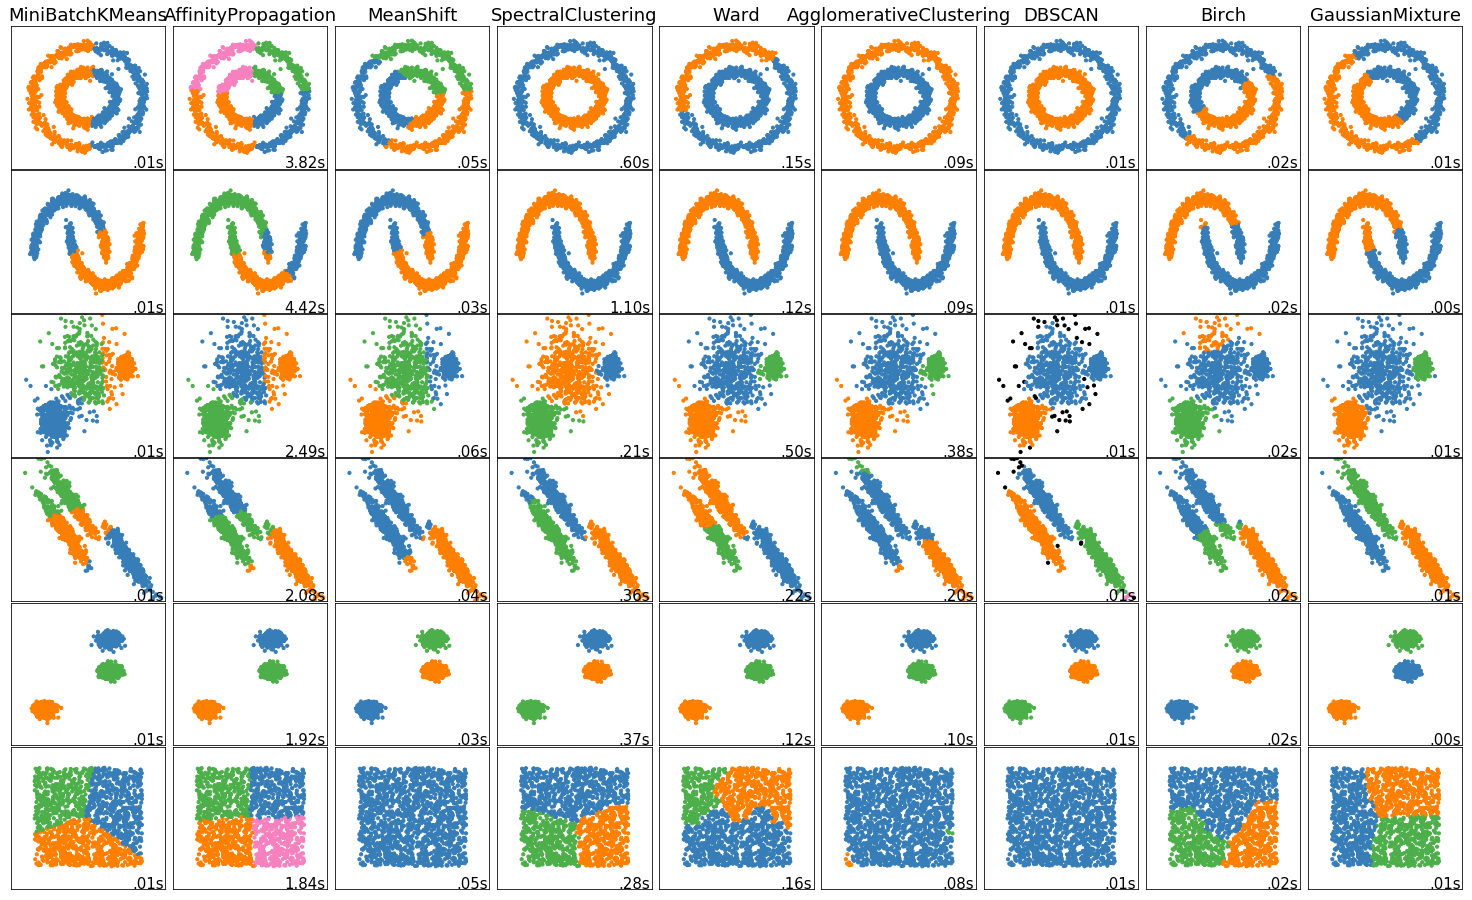

In [72]:
print(__doc__)

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# single linked

In [163]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = tf_idf_matrix
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2)
#clustering.labels_
unique, counts = np.unique(clustering.labels_, return_counts=True)
print("클러스터의 번호: 클러스터에 할당된 doc의 수 ")
print(dict(zip(unique, counts)))

클러스터의 번호: 클러스터에 할당된 doc의 수 
{0: 620, 1: 3}


In [164]:
for i in range(623):
    if(clustering.labels_[i] == 1):
        print(fnames[i])

news-bioProf.txt
news-IT-korea.txt
news-TTS.txt


# complete

# CLINK

In [165]:
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None, n_clusters=2)
#clustering.labels_
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 620, 1: 3}

In [113]:
for i in range(623):
    if(clustering.labels_[i] == 1):
        print(fnames[i])


news-bioProf.txt
news-IT-korea.txt
news-TTS.txt


# ward

In [114]:
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2)
#clustering.labels_
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 620, 1: 3}

In [166]:
for i in range(623):
    if(clustering.labels_[i] == 1):
        print(fnames[i])

news-bioProf.txt
news-IT-korea.txt
news-TTS.txt


# group average

In [170]:
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None, n_clusters=2)
#clustering.labels_
unique, counts = np.unique(clustering.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 620, 1: 3}

In [171]:
for i in range(623):
    if(clustering.labels_[i] == 1):
        print(fnames[i])

news-bioProf.txt
news-IT-korea.txt
news-TTS.txt


# K-means

In [180]:
from sklearn.cluster import KMeans
import numpy as np
X = tf_idf_matrix
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
(kmeans.labels_)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [181]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 2, 1: 18, 2: 1, 3: 10, 4: 592}

In [179]:
for i in range(623):
    if(kmeans.labels_[i] == 1):
        print(fnames[i])

news-bioProf.txt
news-IT-korea.txt
news-TTS.txt


# SLink example

In [134]:
tmp_X = [[1, 1, 1], [1,   1,   0.5], [0.9, 0.9, 0.8],
         [0, 0, 0], [0.1, 0.1, 0.1], [-0.2, 0,  0.3]]

In [160]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = tmp_X
clustering = AgglomerativeClustering().fit(X) 
AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2)
#clustering.labels_
unique, counts = np.unique(clustering.labels_, return_counts=True)
print("클러스터의 번호: 클러스터에 할당된 doc의 수 ")
print(dict(zip(unique, counts)))

클러스터의 번호: 클러스터에 할당된 doc의 수 
{0: 3, 1: 3}


In [140]:
clustering.labels_

array([0, 0, 0, 1, 1, 1])